# Food Map

# Summary

# Motivation

# Imported Libraries

In [1]:
from src.all_functions import *
from src.communities.communities import *

In [2]:
import _pickle as pickle
#Python Libraries for Mongos Database
import pymongo
from pymongo import MongoClient

In [3]:
from collections import Counter, defaultdict, OrderedDict
import itertools
import operator
from operator import itemgetter

In [4]:
import networkx as nx
import pandas as pd
pd.set_option('display.max_rows', 100)

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Webscraping FlavorDB

In [6]:
import requests
from bs4 import BeautifulSoup
import re

In [7]:
pg_num = 10 #https://cosylab.iiitd.edu.in/flavordb/entity_details?id=10
#Request each ingredient page using pg_num variable
flavor_db_webpage =requests.get('https://cosylab.iiitd.edu.in/flavordb/entity_details?id={}'.format(pg_num))

#Soup object accesses the HTML of the Request object
soup = BeautifulSoup(flavor_db_webpage.text, 'html.parser')

#Scrape the ingredient name
ingredient_name = str(soup.find('h1', class_='text-primary text-capitalize').text).strip()

#Scrape the category name
category_name = str(soup.find('span', class_='text-capitalize').text).strip()

#Acess the table (https://stackoverflow.com/questions/23377533/python-beautifulsoup-parsing-table)
molecule_table = soup.find('table', id= 'molecules')
table_body = molecule_table.find('tbody')

#initiating a list for each molecule variable    
list_molecule_names = []
list_molecule_id = []
list_molecule_flavor = []

#Access every row in the table 
for row in table_body.find_all('tr'):
    #Access molecule name, id, and flavor in each row
    molecule_name = row.findAll('td')[0].text.strip()
    molecule_id = row.findAll('td')[1].text.strip()
    molecule_flavor = row.findAll('td')[2].text.strip().split(",")
    list_molecule_names.append(molecule_name)
    list_molecule_id.append(molecule_id)
    list_molecule_flavor.append(molecule_flavor)


print(ingredient_name)
print(category_name)
print(list_molecule_names)

Bantu Beer
Beverage Alcoholic
['1-octanol', 'Phenethyl acetate', 'Pentanal', 'Propionaldehyde', '1-Phenyl-1-propanol', '2-Methylbutyl Acetate', 'dimethyl sulfide', 'benzaldehyde', '2-Acetylpyridine', 'Methyl tetradecanoate', '2-Methyl-1-propanol', 'Isobutyl Acetate', 'Oxirane']


# Webscraping Recipe Puppy API

In [8]:
import requests
from bs4 import BeautifulSoup
import re

In [9]:
ingredient = "tuna" #http://www.recipepuppy.com/?i=tuna&q= 
ing_for_url = "+".join(ingredient.split()).lower()
ingredient_name = ingredient.strip().lower()

In [10]:
url = "http://www.recipepuppy.com/?i={}&q={}".format(ing_for_url, ing_for_url)
recipe_puppy_page = requests.get(url)
soup = BeautifulSoup(recipe_puppy_page.text, 'html.parser')

In [11]:
for result in soup.findAll('div', class_ = "result"):
    result_h3 = result.find('h3')

    #name of the result 
    result_name = result_h3.text.strip()
    # print(result_name)

    #link of the result
    result_link = re.findall(r'\"(.+?)\"', str(result_h3))[0].strip()
    # print(result_link)

    #a list of all the ingredients in a recipe
    result_ing_list = [ingredient_name]
    for recipe_ing in result.find('div', class_ = "ings").findAll('a'):
        recipe_ing_name = recipe_ing.text.strip("+").strip()
        result_ing_list.append(recipe_ing_name)
    result_ing_list.sort()

    print(ingredient_name)
    print(result_name)
    print(result_link)
    print(result_ing_list)
    break

tuna
Carpaccio Of Tuna With Seared Tuna Cube And Tuna Tartar Recipe
http://cookeatshare.com/recipes/carpaccio-of-tuna-with-seared-tuna-cube-and-tuna-tartar-100762
['avocado', 'blood orange', 'chips', 'chives', 'cornmeal', 'cracked black pepper', 'cucumber', 'ginger', 'hot sauce', 'lemon juice', 'mango', 'mint', 'olive oil', 'parsley', 'poppy seeds', 'salt', 'shallot', 'tuna', 'vegetable oil', 'watercress']


# Recipe Puppy API

In [12]:
pickle_in = open("./data/pandas/flavorDB_pandas.pickle","rb")

#Getting the dictionary from the pickle
flavorDB = pickle.load(pickle_in)

In [13]:
pickle_in = open("./data/pandas/mongodb_recipe_puppy_pandas","rb")

#Getting the dictionary from the pickle
recipe_puppy_api = pickle.load(pickle_in)

In [14]:
recipe_puppy_api = recipe_puppy_api.drop_duplicates(subset="recipe_name")

In [15]:
searched_ingredient_list = flavorDB["ingredient"].tolist()

In [16]:
print("Total number of ingredients searched: ", len(searched_ingredient_list))

Total number of ingredients searched:  619


# Filtering out recipes that Only are in FlavorDB

In [17]:
recipe_puppy_api = recipe_puppy_api[recipe_puppy_api["searched_ingredient"].isin(searched_ingredient_list)]

In [18]:
recipe_puppy_api.head()

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
0,5caa762213218a112b0b979f,"[dashi, egg, egg noodles, mushroom, salt, seas...",http://www.grouprecipes.com/31653/egg-noodles-...,Egg Noodles With Wonton Egg And Veggie Recipe,egg
1,5caa762213218a112b0b97a0,"[egg, water]",http://www.recipezaar.com/Egg-Peeling-for-Egg-...,Egg Peeling for Egg Salad,egg
2,5caa762213218a112b0b97a1,"[black pepper, celery, cucumber, curry powder,...",http://www.recipezaar.com/Curried-Egg-Salad-on...,Curried Egg Salad on a Bed of Greens -- an Egg...,egg
3,5caa762213218a112b0b97a2,"[baking powder, butter, egg, green onion, rame...",http://www.recipezaar.com/Ramen-Noodle-Egg-Foo...,Ramen Noodle Egg Foo Yung,egg
4,5caa762213218a112b0b97a3,"[bacon, black pepper, cheese, egg, salt]",http://www.recipezaar.com/Bacon-and-Egg-Cups-1...,Bacon and Egg Cups,egg


In [23]:
print("number of recipes: ", recipe_puppy_api.shape[0])

number of recipes:  88078


In [24]:
ingredient_list = []
for _, rows in recipe_puppy_api.iterrows():
    for ing in rows["recipe_ingredients"]:
        ingredient_list.append(ing)
print("Number of ingredients in Recipe Puppy API: ", len(ingredient_list))

Number of ingredients in Recipe Puppy API:  630803


In [25]:
print("Number of unique ingredients in Recipe Puppy API: ", len(Counter(ingredient_list)))

Number of unique ingredients in Recipe Puppy API:  1637


In [26]:
ingredient_counter = pd.DataFrame.from_dict(Counter(ingredient_list), orient='index').reset_index()
ingredient_counter = ingredient_counter.rename(columns= {"index": "ingredient", 0: "quantity"})
ingredient_counter = ingredient_counter.set_index('ingredient')
ingredient_counter = ingredient_counter.sort_values(by= ["quantity"], ascending= False)

In [27]:
ingredient_counter.head()

,quantity
ingredient,
salt,31979
butter,21543
sugar,17839
black pepper,16464
garlic,16398


In [28]:
ingredient_counter["quantity"].describe()

count     1637.000000
mean       385.340867
std       1587.389698
min          1.000000
25%         12.000000
50%         39.000000
75%        166.000000
max      31979.000000
Name: quantity, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

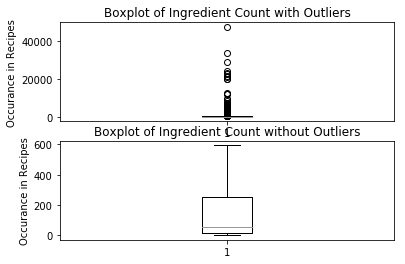

In [21]:
fig, axs = plt.subplots(2)
axs[0].boxplot(ingredient_counter["quantity"])
axs[0].set_title('Boxplot of Ingredient Count with Outliers')
axs[0].set_ylabel("Occurance in Recipes")

axs[1].boxplot(ingredient_counter["quantity"], 0, '')
axs[1].set_title('Boxplot of Ingredient Count without Outliers')
axs[1].set_ylabel("Occurance in Recipes")

plt.show

In [22]:
stop_ingredients = ['salt', 'sugar', 'flour', 'baking powder', 'baking soda', "cornstarch", 'nonstick cooking spray']

In [23]:
stop_ingredients

['salt',
 'sugar',
 'flour',
 'baking powder',
 'baking soda',
 'cornstarch',
 'nonstick cooking spray']

In [24]:
ingredient_counter = ingredient_counter.drop(stop_ingredients)
ingredient_counter.head()

,quantity
ingredient,
butter,33886
black pepper,23980
garlic,23054
olive oil,22736
eggs,21501


In [25]:
unique_list_of_recipe_puppy_ingredients = list(set(ingredient_list))

In [26]:
standarize_ingredient_dict = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
    if king_tup[1] >= 85:
        standarize_ingredient_dict[ing] = king_tup[0]

In [27]:
standarize_ingredient_dict

{'craisins': 'raisin',
 'epazote': 'epazote',
 'saffron': 'saffron',
 'cheeses': 'cheese',
 'cloves': 'clove',
 'sweetcorn': 'sweetcorn',
 'albacore tuna': 'albacore tuna',
 'peanut': 'peanut',
 'coconut': 'coconut',
 'melon': 'melon',
 'figs': 'fig',
 'almonds': 'almond',
 'oysters': 'oyster',
 'romano cheese': 'romano cheese',
 'soy yogurt': 'soy yogurt',
 'pepper': 'pepper',
 'black currants': 'black currant',
 'edam cheese': 'cream cheese',
 'tarragon': 'tarragon',
 'flour': 'flour',
 'cocoa powder': 'cocoa powder',
 'strawberry jam': 'strawberry jam',
 'muenster cheese': 'munster cheese',
 'codfish': 'codfish',
 'kiwifruit': 'kiwifruit',
 'rosemary': 'rosemary',
 'black beans': 'black bear',
 'mushroom': 'mushroom',
 'cheddar cheese soup': 'cheddar cheese',
 'bitter orange': 'bitter orange',
 'cabbage': 'cabbage',
 'chocolate spread': 'chocolate spread',
 'butter': 'butter',
 'peanuts': 'peanut',
 'avocado': 'avocado',
 'gruyere cheese': 'gruyere cheese',
 'papaya': 'papaya',
 'bl

In [28]:
standarize_ingredient_dict_rest = {}
for ing in unique_list_of_recipe_puppy_ingredients:
    king_tup = [ing, 0]
    for ing_2 in searched_ingredient_list:
        fuzz_ratio = fuzz.ratio(ing, ing_2)
        if  fuzz_ratio > king_tup[1]:
            king_tup = [ing_2, fuzz_ratio]
        standarize_ingredient_dict_rest[ing] = (king_tup[0], king_tup[1])

In [29]:
standarize_ingredient_dict_rest

{'tonic water': ('atlantic croaker', 59),
 'craisins': ('raisin', 86),
 'cilantro': ('coriander', 59),
 'taco shells': ('shellfish', 60),
 'purple cabbage': ('purple laver', 69),
 'flour tortillas': ('corn oil', 52),
 'epazote': ('epazote', 100),
 'prosciutto': ('potato', 62),
 'saffron': ('saffron', 100),
 'cheeses': ('cheese', 92),
 'chambord': ('chard', 77),
 'shrimp paste': ('shrimp', 67),
 'cloves': ('clove', 91),
 'sweetcorn': ('sweetcorn', 100),
 'havarti cheese': ('goat cheese', 72),
 'enoki mushrooms': ('mushroom', 70),
 'maple syrup': ('apple sauce', 64),
 'albacore tuna': ('albacore tuna', 100),
 'apple liqueur': ('apple sauce', 67),
 'peanut': ('peanut', 100),
 'champagne vinegar': ('apple cider vinegar', 61),
 'mixed berries': ('mixed nuts', 61),
 'green bananas': ('green beans', 83),
 'coconut': ('coconut', 100),
 'cornflakes': ('corn salad', 60),
 '7 up': ('scup', 50),
 'adzuki beans': ('ascidians', 57),
 'fontina cheese': ('feta cheese', 80),
 'prepared pizza crust': ('

(array([  4.,   4.,  12.,  12.,  49.,  77.,  70., 115.,  90., 116., 150.,
         71., 229.,  26.,  40.,  72.,  73.,  59.,  36.,  28.,  23.,  11.,
         11.,   4.,   3.,  15.,   7.,  12.,   2., 218.]),
 array([ 42.        ,  43.93333333,  45.86666667,  47.8       ,
         49.73333333,  51.66666667,  53.6       ,  55.53333333,
         57.46666667,  59.4       ,  61.33333333,  63.26666667,
         65.2       ,  67.13333333,  69.06666667,  71.        ,
         72.93333333,  74.86666667,  76.8       ,  78.73333333,
         80.66666667,  82.6       ,  84.53333333,  86.46666667,
         88.4       ,  90.33333333,  92.26666667,  94.2       ,
         96.13333333,  98.06666667, 100.        ]),
 <a list of 30 Patch objects>)

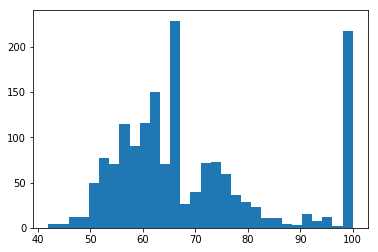

In [30]:
plt.hist([v[1] for k,v in standarize_ingredient_dict_rest.items()], bins=30)

In [31]:
def cleaner(row):
    ingredient_list = row["recipe_ingredients"]
    ingredient_list = [standarize_ingredient_dict[ing] for ing in ingredient_list if ing in standarize_ingredient_dict and ing not in ["garlic", "onion"]]
    return ingredient_list

In [32]:
recipe_puppy_api["recipe_ingredients"] = recipe_puppy_api.apply(lambda row: cleaner(row), axis=1)

In [33]:
recipe_puppy_api.tail(100)

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
172842,5cab60ba13218a1fd2639570,"[bitter orange, orange]",http://allrecipes.com/Recipe/Cranberry-Orange-...,Cranberry Orange Relish with Orange Flavored L...,bitter orange
172843,5cab60ba13218a1fd2639571,"[bitter orange, orange]",http://allrecipes.com/Recipe/Orange-Baked-Alas...,Orange Baked Alaska,bitter orange
172844,5cab60ba13218a1fd2639572,"[almond, bitter orange, butter, cinnamon, egg,...",http://allrecipes.com/Recipe/Gluten-Free-Orang...,Gluten-Free Orange Almond Cake with Orange Sauce,bitter orange
172845,5cab60ba13218a1fd2639573,"[bitter orange, orange, rice]",http://www.recipezaar.com/Fresh-Orange-Rice-14...,Fresh Orange Rice,bitter orange
172846,5cab60ba13218a1fd2639574,"[bitter orange, egg, honey, milk]",http://www.recipezaar.com/Strawberry-Orange-Ju...,Strawberry Orange Julius Smoothie,bitter orange
172847,5cab60ba13218a1fd2639575,"[bitter orange, butter, cinnamon, cocoa powder...",http://www.epicurious.com/recipes/food/views/F...,Fudgy Orange-Zucchini Cake with Orange Glaze,bitter orange
172848,5cab60ba13218a1fd2639576,"[bitter orange, butter, chocolate, cocoa powde...",http://www.recipezaar.com/Chocolate-Orange-Cak...,Chocolate-Orange Cake,bitter orange
172849,5cab60ba13218a1fd2639577,"[bitter orange, clove, ham]",http://www.grouprecipes.com/53661/orange-bourb...,Orange-bourbon Glazed Ham Recipe,bitter orange
172850,5cab60ba13218a1fd2639578,"[bitter orange, cisco, egg, flour, milk, orange]",http://www.grouprecipes.com/71081/orange-cooki...,Orange Cookies Recipe,bitter orange
172851,5cab60ba13218a1fd2639579,"[beef, bitter orange, ginger]",http://www.recipezaar.com/fortune-garden-orang...,Fortune Garden Orange Beef,bitter orange


# Making a Graph

In [34]:
sample_recipes = recipe_puppy_api.sample(n=5, random_state=10)

In [35]:
sample_recipes

,_id,recipe_ingredients,recipe_link,recipe_name,searched_ingredient
122230,5caa83da13218a112b0d7515,"[celery, cream, egg, mustard, onion, potato, w...",http://www.recipezaar.com/Nans-Classic-Mustard...,Nan's Classic Mustard Potato Salad,potato
133391,5caa852c13218a112b0da0ae,[summer savory],http://www.epicurious.com/recipes/food/views/G...,Grilled Country Ribs with Summer Savory Mustar...,summer savory
125041,5caa842c13218a112b0d8010,"[eggplant, parsley]","http://www.cooks.com/rec/view/0,191,152178-251...",Eggplant And Tahini,eggplant
169299,5caa896a13218a112b0e2cf2,"[semolina, squid]",http://www.bbc.co.uk/food/recipes/database/cri...,Crispy squid with garlic mayonnaise,squid
25815,5caa78f813218a112b0bfc76,"[blue cheese, onion]",http://cookeatshare.com/recipes/blue-cheese-sa...,Blue Cheese Salad Dressing Recipe,blue cheese


In [36]:
sample_recipes["recipe_ingredients"][122230]

['celery', 'cream', 'egg', 'mustard', 'onion', 'potato', 'white pepper']

In [37]:
sample_graph = graph_based_on_shared_recipe_creator(sample_recipes)

In [38]:
sample_graph.edges(data = True)

EdgeDataView([('egg', 'white pepper', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('egg', 'onion', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('egg', 'potato', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('egg', 'mustard', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('egg', 'cream', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('egg', 'celery', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'onion', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('white pepper', 'potato', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'mustard', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'cream', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('white pepper', 'celery', {'weight': 1, 'pmi': 0.6020599913279624, 'iou': 0.5}), ('onion', 'potato', {'weight': 1, 'pmi': 0.3010299956639812, 'iou': 0.3333333333333333}), ('onion', 'mus

In [39]:
nx.pagerank(sample_graph, alpha=0.9)


{'egg': 0.08926567521905736,
 'white pepper': 0.08926567521905736,
 'onion': 0.10875582578455398,
 'potato': 0.08926567521905736,
 'mustard': 0.08926567521905736,
 'cream': 0.08926567521905736,
 'celery': 0.08926567521905736,
 'eggplant': 0.08333333333333333,
 'parsley': 0.08333333333333333,
 'squid': 0.08333333333333333,
 'semolina': 0.08333333333333333,
 'blue cheese': 0.02231678956776844}

In [40]:
nx.betweenness_centrality(sample_graph)

{'egg': 0.0,
 'white pepper': 0.0,
 'onion': 0.10909090909090909,
 'potato': 0.0,
 'mustard': 0.0,
 'cream': 0.0,
 'celery': 0.0,
 'eggplant': 0.0,
 'parsley': 0.0,
 'squid': 0.0,
 'semolina': 0.0,
 'blue cheese': 0.0}

In [41]:
recipe_graph = graph_based_on_shared_recipe_creator(recipe_puppy_api)

In [42]:
recipe_graph["flour"]

AtlasView({'egg': {'weight': 7336, 'pmi': 0.4117144655118662, 'iou': 0.24581155341107092}, 'butter': {'weight': 7706, 'pmi': 0.2588725842251223, 'iou': 0.20611993794468517}, 'cumin': {'weight': 199, 'pmi': -0.4027182726627315, 'iou': 0.011525541526699873}, 'basil': {'weight': 259, 'pmi': -0.40256073284303046, 'iou': 0.014325221238938052}, 'evaporated milk': {'weight': 154, 'pmi': 0.10638105316302991, 'iou': 0.01012491781722551}, 'milk': {'weight': 3178, 'pmi': 0.3436238867681837, 'iou': 0.14247287725275712}, 'cheddar cheese': {'weight': 722, 'pmi': 0.08818736284934345, 'iou': 0.040721940214326}, 'cheese': {'weight': 256, 'pmi': -0.023889103014009313, 'iou': 0.015984015984015984}, 'tomato': {'weight': 365, 'pmi': -0.4653506195959777, 'iou': 0.017988270661869796}, 'jalapeno': {'weight': 217, 'pmi': -0.15268945416856508, 'iou': 0.013378545006165228}, 'onion': {'weight': 1712, 'pmi': -0.19315485045878644, 'iou': 0.05919778699861687}, 'cocoa powder': {'weight': 694, 'pmi': 0.394258308722152

# EDA with Graphs

In [43]:
dict_ingredient_quanitities = {}
for node in recipe_graph.nodes(data= True):
    ingredient_name = node[0]
    ingredient_quantity = node[1]['quantity']
    dict_ingredient_quanitities[ingredient_name] = ingredient_quantity

In [44]:
sorted_dict_ingredient_quanitities = sorted(dict_ingredient_quanitities.items(), key=lambda kv: kv[1], reverse=True)
sorted_dict_ingredient_quanitities

[('butter', 22824),
 ('egg', 15282),
 ('flour', 14562),
 ('onion', 14358),
 ('milk', 7744),
 ('parsley', 6729),
 ('cinnamon', 5906),
 ('tomato', 5729),
 ('chicken', 5137),
 ('celery', 4482),
 ('parmesan cheese', 4285),
 ('ginger', 3985),
 ('carrot', 3886),
 ('honey', 3880),
 ('potato', 3848),
 ('thyme', 3637),
 ('basil', 3518),
 ('rice', 3397),
 ('cheddar cheese', 3168),
 ('cream cheese', 3131),
 ('nutmeg', 3035),
 ('cumin', 2704),
 ('walnut', 2674),
 ('cream', 2543),
 ('shallot', 2531),
 ('lemon', 2476),
 ('mushroom', 2448),
 ('almond', 2381),
 ('apple', 2332),
 ('yogurt', 2308),
 ('oregano', 2269),
 ('pecans', 2266),
 ('raisin', 2118),
 ('spinach', 2116),
 ('mint', 2101),
 ('rosemary', 1909),
 ('shrimp', 1790),
 ('lettuce', 1782),
 ('mozzarella cheese', 1750),
 ('jalapeno', 1658),
 ('white pepper', 1631),
 ('banana', 1617),
 ('lime', 1603),
 ('cucumber', 1602),
 ('coriander', 1582),
 ('sage', 1580),
 ('buttermilk', 1568),
 ('pineapple', 1531),
 ('leek', 1522),
 ('cocoa powder', 1505)

In [45]:
#to dictionary to numpy array and then getting log 10
dict_sorted_dict_ingredient_quanitities = OrderedDict(sorted_dict_ingredient_quanitities)
vals = np.fromiter(dict_sorted_dict_ingredient_quanitities.values(), dtype=float)
np.log10(vals)

array([4.35839176, 4.1841802 , 4.16322103, 4.15709395, 3.88896534,
       3.82795053, 3.77129344, 3.75807882, 3.71070957, 3.65147185,
       3.63195083, 3.60042833, 3.5895028 , 3.58883173, 3.58523506,
       3.5607433 , 3.54629584, 3.53109555, 3.50078517, 3.49568307,
       3.4821587 , 3.43200669, 3.4271614 , 3.40534636, 3.40329215,
       3.39375064, 3.38881141, 3.3767594 , 3.36772855, 3.3632358 ,
       3.3558345 , 3.35525991, 3.32592596, 3.32551566, 3.32242605,
       3.28080593, 3.25285303, 3.2509077 , 3.24303805, 3.21958453,
       3.21245396, 3.20871002, 3.20493352, 3.20466251, 3.19920648,
       3.19865709, 3.19534606, 3.18497519, 3.18241465, 3.1775365 ,
       3.17055506, 3.16761267, 3.16554108, 3.16256441, 3.15167623,
       3.13161866, 3.12515583, 3.12287092, 3.10856502, 3.10516943,
       3.09795107, 3.08671566, 3.07700433, 3.07261748, 3.06892761,
       3.05918462, 3.05652372, 3.0534626 , 3.03342376, 3.03261876,
       3.0322157 , 3.03100428, 3.02612452, 3.01703334, 3.01410

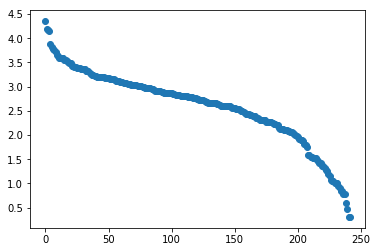

In [46]:
plt.scatter(np.arange(len(sorted_dict_ingredient_quanitities)), np.log10(vals))

/home/ryoiwata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


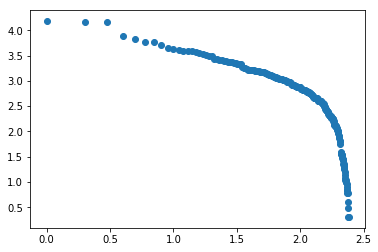

In [47]:
plt.scatter(np.log10(np.arange(len(sorted_dict_ingredient_quanitities))), np.log10(vals))

# Measures of Centrality

In [48]:
recipe_degree_centrality = nx.degree_centrality(recipe_graph)

In [49]:
sorted_recipe_degree_centrality = sorted(recipe_degree_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [50]:
dict_sorted_recipe_degree_centrality = OrderedDict(sorted_recipe_degree_centrality)
dict_sorted_recipe_degree_centrality

OrderedDict([('egg', 0.9585062240663901),
             ('butter', 0.9585062240663901),
             ('onion', 0.9585062240663901),
             ('flour', 0.950207468879668),
             ('honey', 0.921161825726141),
             ('rice', 0.9087136929460581),
             ('ginger', 0.9045643153526971),
             ('milk', 0.9045643153526971),
             ('celery', 0.8962655601659751),
             ('parsley', 0.8962655601659751),
             ('tomato', 0.8962655601659751),
             ('carrot', 0.8962655601659751),
             ('cream', 0.8921161825726142),
             ('shallot', 0.8879668049792531),
             ('basil', 0.8879668049792531),
             ('chicken', 0.8838174273858921),
             ('cinnamon', 0.8796680497925311),
             ('lemon', 0.8755186721991701),
             ('potato', 0.8755186721991701),
             ('nutmeg', 0.8713692946058091),
             ('thyme', 0.8672199170124482),
             ('cumin', 0.8630705394190872),
             ('yogurt'

# Betweenness Centrality

In [51]:
recipe_betweenness_centrality = nx.betweenness_centrality(recipe_graph)

In [52]:
sorted_recipe_betweenness_centrality = sorted(recipe_betweenness_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [53]:
dict_sorted_recipe_betweenness_centrality = OrderedDict(sorted_recipe_betweenness_centrality)
dict_sorted_recipe_betweenness_centrality

OrderedDict([('butter', 0.01455881030684281),
             ('egg', 0.012587065777316437),
             ('onion', 0.011838759073511696),
             ('honey', 0.010912742838918939),
             ('flour', 0.010741412247967173),
             ('apple', 0.010362754803958056),
             ('ginger', 0.00975180599408556),
             ('cream', 0.008842612684557742),
             ('shallot', 0.008729562419450174),
             ('orange', 0.008647310351886454),
             ('rice', 0.008262622446575376),
             ('celery', 0.007630064225603162),
             ('lemon', 0.007623172054275588),
             ('parsley', 0.007622932991906819),
             ('tomato', 0.007600795720302217),
             ('milk', 0.007587483368719142),
             ('chicken', 0.007470861947347934),
             ('carrot', 0.007386686625064912),
             ('cinnamon', 0.0072318940071709045),
             ('basil', 0.006777192622467329),
             ('potato', 0.006651532386255835),
             ('mango', 

# Page Rank Centrality

In [54]:
recipe_page_rank_centrality = nx.pagerank(recipe_graph)

In [55]:
sorted_page_rank_centrality = sorted(recipe_page_rank_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [56]:
dict_sorted_recipe_page_rank_centrality = OrderedDict(sorted_page_rank_centrality)
dict_sorted_recipe_page_rank_centrality

OrderedDict([('butter', 0.06596141459485329),
             ('onion', 0.04772048633947915),
             ('flour', 0.04599532772714486),
             ('egg', 0.04589736478851468),
             ('milk', 0.02362461056226691),
             ('parsley', 0.023014170412588776),
             ('cinnamon', 0.01962246030139322),
             ('tomato', 0.01912963194900403),
             ('celery', 0.016533692797347004),
             ('chicken', 0.014788922399117313),
             ('carrot', 0.014699808890596118),
             ('ginger', 0.013552287487744206),
             ('thyme', 0.013467865581538837),
             ('parmesan cheese', 0.012503319718071363),
             ('potato', 0.01214167562427882),
             ('nutmeg', 0.011785799159618648),
             ('honey', 0.011632409918005909),
             ('basil', 0.01081755875206296),
             ('rice', 0.010418434845988568),
             ('cumin', 0.010039056954369966),
             ('shallot', 0.009355613869392146),
             ('chedda

# Eigen Vector Centrality

In [57]:
recipe_eigenvector_centrality = nx.eigenvector_centrality(recipe_graph, max_iter=10000)

In [58]:
sorted_eigenvector_centrality = sorted(recipe_eigenvector_centrality.items(), key=lambda kv: kv[1], reverse=True)

In [59]:
dict_sorted_eigenvector_centrality = OrderedDict(sorted_page_rank_centrality)
dict_sorted_eigenvector_centrality

OrderedDict([('butter', 0.06596141459485329),
             ('onion', 0.04772048633947915),
             ('flour', 0.04599532772714486),
             ('egg', 0.04589736478851468),
             ('milk', 0.02362461056226691),
             ('parsley', 0.023014170412588776),
             ('cinnamon', 0.01962246030139322),
             ('tomato', 0.01912963194900403),
             ('celery', 0.016533692797347004),
             ('chicken', 0.014788922399117313),
             ('carrot', 0.014699808890596118),
             ('ginger', 0.013552287487744206),
             ('thyme', 0.013467865581538837),
             ('parmesan cheese', 0.012503319718071363),
             ('potato', 0.01214167562427882),
             ('nutmeg', 0.011785799159618648),
             ('honey', 0.011632409918005909),
             ('basil', 0.01081755875206296),
             ('rice', 0.010418434845988568),
             ('cumin', 0.010039056954369966),
             ('shallot', 0.009355613869392146),
             ('chedda

# Compliments

In [60]:
list_of_edges_quant25 = []
for edge in recipe_graph.edges(data= True):
    ingredient_1 = edge[0]
    ingredient_2 = edge[1]
    quantity_ing1 = recipe_graph.node[ingredient_1]['quantity']
    quantity_ing2 = recipe_graph.node[ingredient_2]['quantity']
    
    if quantity_ing1 >= 25 and quantity_ing2 >= 25:
       list_of_edges_quant25.append(edge)


In [61]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['weight'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['weight']))

butter flour 7706
egg flour 7336
egg butter 6221
butter onion 3749
butter milk 3267
milk flour 3178
egg milk 3108
celery onion 2483
onion tomato 2257
butter cinnamon 2190
onion parsley 2135
butter parsley 2087
flour cinnamon 2060
egg onion 1929
egg cinnamon 1922
onion carrot 1744
onion flour 1712
onion potato 1458
butter parmesan cheese 1423
butter nutmeg 1381
onion thyme 1318
butter potato 1308
nutmeg cinnamon 1201
celery carrot 1198
butter thyme 1194
celery butter 1184
egg nutmeg 1172
onion chicken 1168
flour nutmeg 1155
butter cheddar cheese 1145
butter cream 1118
butter chicken 1118
onion milk 1075
mushroom onion 1050
onion cumin 1007
butter pecans 998
basil tomato 979
shallot butter 969
flour buttermilk 963
onion rice 915
butter carrot 905
butter almond 897
egg parsley 889
walnut butter 871
onion cheddar cheese 869
celery parsley 867
mushroom butter 854
egg cheddar cheese 842
parsley flour 831
onion parmesan cheese 817
butter cream cheese 809
parsley tomato 809
walnut flour 805
ci

coriander ghee 36
coriander peanut 36
chicken romano cheese 36
potato marjoram 36
potato clove 36
shrimp corn 36
avocado papaya 36
honey turmeric 36
carrot peanut butter 36
turmeric coconut 36
cinnamon mandarin orange 36
cinnamon bulgur 36
cinnamon cherry 36
cream parsnip 36
cream haddock 36
beef meat 36
coconut chocolate 36
corn barley 36
mozzarella cheese rosemary 36
almond quinoa 36
raisin quinoa 36
cherry tomato rosemary 36
rosemary feta cheese 36
rosemary lemon verbena 36
white pepper cinnamon 35
egg grapefruit 35
mushroom feta cheese 35
mushroom cream cheese 35
mushroom goat cheese 35
shallot yogurt 35
shallot pheasant 35
ginger star anise 35
celery pepper 35
walnut cardamom 35
butter buffalo 35
milk pepper 35
milk goat cheese 35
milk currant 35
milk prickly pear 35
basil beef 35
chive oregano 35
parsley roquefort cheese 35
tomato papaya 35
flour strawberry 35
nutmeg pineapple 35
cheddar cheese asparagus 35
cumin tofu 35
cream cheese raisin 35
parmesan cheese corn 35
parmesan che

coriander cabbage 13
coriander sage 13
coriander rosemary 13
coriander yam 13
chicken melon 13
chicken jicama 13
chicken star anise 13
lettuce banana 13
vinegar blue cheese 13
vinegar apple 13
vinegar beef 13
vinegar prickly pear 13
vinegar asparagus 13
ham cherry tomato 13
potato plum 13
potato peanut butter 13
potato peanut oil 13
potato okra 13
potato anchovy 13
black bear feta cheese 13
shrimp mozzarella cheese 13
pineapple tofu 13
cocoa powder dates 13
cocoa powder oregano 13
buttermilk apple 13
buttermilk apricot 13
buttermilk clove 13
buttermilk dill 13
avocado thyme 13
avocado wasabi 13
avocado corn grits 13
radish yogurt 13
swiss cheese romano cheese 13
swiss cheese cauliflower 13
pecans peanut butter 13
carrot romano cheese 13
carrot clam 13
carrot apricot 13
turmeric beef 13
tofu green beans 13
tofu quinoa 13
banana clove 13
cabbage cinnamon 13
cabbage kale 13
broccoli yellowfin tuna 13
cinnamon fig 13
cinnamon cherry tomato 13
cinnamon pistachio 13
cream sweetcorn 13
cream 

almond melon 6
almond endive 6
almond atlantic salmon 6
almond yellowfin tuna 6
peanut butter apple sauce 6
peanut butter strawberry jam 6
peanut butter green beans 6
romano cheese clove 6
romano cheese pepper 6
apple cider vinegar goat cheese 6
turnip sweet potato 6
raisin goat cheese 6
raisin rhubarb 6
raisin peanut oil 6
peanut cherry tomato 6
peanut thyme 6
coffee lamb 6
coffee peanut oil 6
cardamom fennel 6
cardamom pumpkin 6
cardamom rhubarb 6
cardamom grape 6
cardamom cauliflower 6
cardamom okra 6
cardamom butternut squash 6
hazelnut apricot 6
hazelnut endive 6
hazelnut clove 6
hazelnut blackberry 6
hazelnut brazil nut 6
hazelnut quinoa 6
clove goat cheese 6
clove grape 6
clove yellow zucchini 6
milk powder vanilla 6
saffron sage 6
saffron salmon 6
saffron cauliflower 6
saffron allspice 6
saffron butternut squash 6
lime cherry 6
lime cashew nut 6
thyme sweetcorn 6
thyme macaroni 6
allspice pomegranate 6
allspice grapefruit 6
allspice eggplant 6
allspice cashew nut 6
allspice red

mango yam 3
mango prickly pear 3
mango sweet potato 3
mango pomegranate 3
mango red rice 3
mango monkfish 3
mango atlantic salmon 3
mango yellowfin tuna 3
peach feta cheese 3
peach cherry 3
peach rhubarb 3
peach sweet potato 3
peach pomegranate 3
sweet potato caviar 3
sweet potato dates 3
sweet potato pumpkin 3
sweet potato asparagus 3
sweet potato feta cheese 3
sweet potato star anise 3
sweet potato oats 3
sweet potato okra 3
sweet potato haddock 3
sweet potato meat 3
salmon green beans 3
salmon lobster 3
salmon pink salmon 3
barley arrowroot 3
barley bulgur 3
barley oats 3
barley quinoa 3
barley meat 3
sage chervil 3
sage arrowroot 3
sage beetroot 3
sage swordfish 3
sage yellow zucchini 3
parsnip codfish 3
parsnip cherry 3
parsnip brussels sprout 3
parsnip chestnut 3
parsnip cauliflower 3
parsnip eggplant 3
parsnip winter squash 3
parsnip butternut 3
parsnip monkfish 3
parsnip pheasant 3
asparagus jicama 3
asparagus oyster 3
asparagus papaya 3
asparagus peanut oil 3
asparagus swordfi

nuts turkey 1
nuts star anise 1
nuts pepper 1
nuts endive 1
nuts asparagus 1
nuts beetroot 1
nuts chervil 1
nuts parsnip 1
nuts turnip 1
nuts monkfish 1
nuts quinoa 1
nuts atlantic salmon 1
nuts capers 1
nuts quail 1
nuts melon 1
pineapple coffee 1
pineapple popcorn 1
pineapple gruyere cheese 1
pineapple roquefort cheese 1
pineapple radish 1
pineapple endive 1
pineapple crab 1
pineapple chayote 1
pineapple orange roughy 1
pineapple barley 1
pineapple cocoa powder 1
pineapple cauliflower 1
pineapple romano cheese 1
pineapple cisco 1
pineapple pumpkin 1
pineapple lamb 1
pineapple goat cheese 1
pineapple star anise 1
pineapple ghee 1
pineapple fennel 1
pineapple buffalo 1
pineapple haddock 1
pineapple monkfish 1
pineapple pheasant 1
pineapple soybean sauce 1
pineapple cherry pepper 1
pineapple rabbit 1
pineapple catfish 1
pineapple bulgur 1
pineapple soy yogurt 1
cherry pepper beef 1
cherry pepper blue cheese 1
cherry pepper gruyere cheese 1
cherry pepper codfish 1
cherry pepper grapefrui

In [62]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['pmi'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['pmi']))

turnip rutabaga 2.230544633049769
fenugreek mustard oil 2.219254552067457
parsnip rutabaga 1.8860637475002526
heart of palm chayote 1.871227993727252
turmeric fenugreek 1.7926993315468236
ghee semolina 1.7794625303446643
goat cheese goat milk 1.757631717048645
brussels sprout chestnut 1.7530226397779205
turmeric mustard oil 1.6928449378919859
ghee fenugreek 1.5857860964878703
brussels sprout amaranth 1.5701979980632708
dates brazil nut 1.5153493300559258
fish whitefish 1.5080500913144264
peanut butter peanut oil 1.507479216658481
fenugreek amaranth 1.5032512084326577
corn corn oil 1.4791631320763599
passionfruit mango 1.471011817688015
chestnut quail 1.454007935349265
amaranth fig 1.4513334091671641
cardamom ghee 1.4447007239290133
chervil beetroot 1.4443322718140117
macadamia nut ginkgo nuts 1.4282223901966782
summer savory albacore tuna 1.4107827813039848
wasabi yellowfin tuna 1.4074243040608634
turnip parsnip 1.4073853219409516
turmeric ghee 1.4046101404684341
coriander fenugreek 1.

allspice pumpkin 0.7500947132458515
black bear winter squash 0.7492845638984558
potato rutabaga 0.7491132906399507
poppy seed grapefruit 0.7488020576598088
coconut semolina 0.7480801647368329
vinegar beetroot 0.7470942517551818
shallot tarragon 0.7454196318855602
marjoram brussels sprout 0.7451771067495845
grape roquefort cheese 0.7441498711084006
fenugreek haddock 0.7440677971249939
avocado papaya 0.7426033351840764
mint bulgur 0.7404117335292558
mustard poppy seed 0.7402502725596206
allspice yam 0.7392558032685106
potato parsnip 0.7388673361739886
parmesan cheese mozzarella cheese 0.738826793373184
buttermilk corn oil 0.7383154682359028
quinoa chestnut 0.738198863460896
walnut endive 0.7378290746830476
mushroom water chestnut 0.7374707920717635
lemon swordfish 0.7369184154453203
orange rhubarb 0.7365938745185165
condensed milk coffee 0.7361270693097566
walnut roquefort cheese 0.7357683615312676
cardamom mustard oil 0.7357464986863937
spinach feta cheese 0.7353751136101715
turmeric am

carrot wild rice 0.3194531951387546
ginger honey 0.3192935296195348
leek goat milk 0.3191312474668708
pork apple 0.3190562251790585
horseradish meat 0.3189770345251527
tomato shrimp 0.3188871587239888
lettuce peanut 0.31885578658839714
coffee clove 0.31866492093524384
brussels sprout endive 0.31865336547920786
shrimp fenugreek 0.31858403919892614
cherry tomato eggplant 0.31856093289784304
cottage cheese horseradish 0.31853590245888247
parsley quinoa 0.31848830047011556
honey grape 0.31847952049121164
ginger cabbage 0.3182248556490227
evaporated milk pecans 0.31788606054126595
mushroom chicken 0.3178818525264423
tomato jalapeno 0.3173935572304153
lettuce lobster 0.3173099748466442
tarragon green beans 0.3172798505854818
shallot quinoa 0.3171779513422102
rice raspberry 0.3171375287158444
vinegar soy yogurt 0.31696955971174295
onion saffron 0.3167832584610738
semolina roquefort cheese 0.31671640057784567
raisin cashew nut 0.3164978818397064
almond oats 0.3161832355438454
cisco cherry 0.31

white pepper dill 0.2626129277499043
chive grapefruit 0.2625793134913293
evaporated milk catfish 0.2625374235002765
arrowroot provolone cheese 0.2625171146559274
ricotta cheese oregano 0.26251051448599094
nutmeg leek 0.26250677255385785
ginger squid 0.2624934222044389
cinnamon hazelnut 0.262429852321885
walnut plum 0.2623749793308482
orange lemon verbena 0.26234541043497817
spinach beetroot 0.2623118230038405
currant prickly pear 0.2622802482841419
lemon semolina 0.262218394262465
egg poppy seed 0.26211274948360697
walnut condensed milk 0.2616612659707077
parsley salmon 0.26132825695099654
banana chocolate 0.26104542647792056
cumin butternut squash 0.26100870810618887
shallot grape 0.2609810522408703
cumin turnip 0.26093594367912687
cherry brazil nut 0.26080443891448757
chicken basmati rice 0.2605516570010711
ricotta cheese summer savory 0.26041016337047307
water chestnut brussels sprout 0.2603495373521009
oyster crab 0.2603192275163136
turnip lobster 0.26029397093561857
broccoli peanu

cumin peanut 0.0747050532725657
tomato swiss cheese 0.07468901318157553
nutmeg marjoram 0.07459341720890143
ginger beetroot 0.0745493363537577
cucumber turmeric 0.07444815028849766
walnut goat milk 0.07438449697545922
honey soybean sauce 0.07437571794025738
honey munster cheese 0.07437571794025738
shrimp jicama 0.07428166798387201
ricotta cheese anchovy 0.07427696602065123
carrot clove 0.0740454040413433
blue cheese butternut squash 0.07397426674224436
butter saffron 0.07395617158124998
kale fig 0.07391506763972813
cumin cherry tomato 0.07390401803427653
nuts roquefort cheese 0.07384930032198256
romano cheese cherry tomato 0.07374343586128662
broccoli poppy seed 0.07372765703356159
carrot soybean sauce 0.07370464727070082
carrot passionfruit 0.07370464727070082
orange sweet potato 0.07367120668318076
celery corn 0.07365236743383889
chive cheddar cheese 0.07357448219314945
mushroom sweetcorn 0.07348118728022764
flour cottage cheese 0.07345884154807795
honey currant 0.07326640831566691
m

potato buffalo -0.12294246261202413
potato brussels sprout -0.12294246261202417
potato whitefish -0.12294246261202417
potato heart of palm -0.12294246261202417
cream cheese dates -0.123001241129721
sage plum -0.12307991932527894
saffron butternut squash -0.12313748961530298
lettuce anchovy -0.12316812875474943
lettuce mozzarella cheese -0.12316812875474947
mustard cumin -0.12340799431262214
buttermilk chocolate -0.12353062063613535
banana almond -0.12361132633154753
mandarin orange pomegranate -0.12362745664727924
peanut oyster -0.123919503478336
pistachio eggplant -0.12396120842693494
kale haddock -0.12404460631137816
rice spinach -0.12410575458318229
cheddar cheese oregano -0.12411421315239801
tofu plum -0.12417800962433104
horseradish provolone cheese -0.12419051408426189
celery tangerine -0.12423844451227654
salmon asparagus -0.12426553328404012
skimmed milk parsnip -0.1242947039180037
mozzarella cheese pepper -0.12435460175595751
egg goat cheese -0.12439916634002848
feta cheese gr

walnut ghee -0.3430647526484949
milk powder oyster mushroom -0.34309245024154295
barley oats -0.3431537143995513
rice eggplant -0.34330289424120863
apple goat milk -0.3433039009052141
white pepper pepper -0.3436479873265387
tomato dill -0.343709773813044
kale peanut oil -0.3437554060738095
skimmed milk blackberry -0.34388737323013596
turmeric apple -0.343890389153566
rice cherry tomato -0.3439436041905658
beef sweet potato -0.3442735282746971
turmeric mango -0.3444487279687206
cumin chestnut -0.34453029634074694
black bear orange -0.34460975848295167
lime brussels sprout -0.34470091292835603
coconut apple -0.34497748479478024
broccoli monkfish -0.34525495437805354
apple sauce meat -0.3452624704423856
rice chocolate -0.345336756850907
mustard squid -0.34538521441709275
tarragon bitter orange -0.3454428169746285
onion plum -0.3455632107787485
mango peanut oil -0.3456193337499678
yam pumpkin -0.34564311421415406
mint coffee -0.3457497348135963
tofu apricot -0.34584331911888805
shrimp hone

chive corn oil -0.6348335406089237
avocado apricot -0.6348644073098537
mustard buttermilk -0.6349353923976438
jalapeno barley -0.6350257787135305
rosemary dates -0.6351228298427348
tomato dates -0.6352744689790182
milk powder sage -0.6354144953908748
cream cheese brussels sprout -0.6354504581911264
orange popcorn -0.6356841438323845
pineapple pheasant -0.6357110994706332
egg kale -0.6357574885905548
coriander milk powder -0.6359638875981101
evaporated milk buttermilk -0.636143444586612
fish wild rice -0.6363511250633058
cheddar cheese milk powder -0.636512585689927
broccoli pear -0.6367917965082055
horseradish turmeric -0.6370273210704588
potato black bear -0.637293412512897
tofu parsnip -0.6374136119091851
shallot cinnamon -0.6374765463883879
onion fig -0.6375746780837552
feta cheese fennel -0.6376360209174251
feta cheese wild rice -0.6376360209174251
cornbread cream -0.6377131131634901
avocado raisin -0.6377446275996186
lime rosemary -0.6378405763957481
provolone cheese yellow zucchi

celery banana -1.267555502856686
basil coffee -1.268589521865105
apple macaroni -1.269256770856662
cream cheese kale -1.2694796555941306
peanut butter lamb -1.2708570906394816
pecans red rice -1.2711632552499077
cumin romano cheese -1.2715475874634292
parsley prickly pear -1.2734142086620122
lettuce coffee -1.2742313821084996
mango sage -1.2753475982717775
almond macaroni -1.2782876201745652
orange eggplant -1.280850015762692
celery lemon verbena -1.282211609390146
chocolate oregano -1.2840190581726518
clove asparagus -1.2841305396318297
potato currant -1.2848647654734942
cardamom sage -1.2868193292123478
tomato chocolate -1.2883233758652908
cinnamon jicama -1.2892567836795512
chicken turkey -1.2919975362769867
pecans lobster -1.2921922092997842
butter melon -1.2940391665673063
banana pepper -1.2941465556319889
lemon macaroni -1.2952788651177658
milk apple cider vinegar -1.2974233563437998
jalapeno broccoli -1.2976677521892945
mushroom oats -1.2979287738527607
cocoa powder sweet potato

In [63]:
for a, b, data in sorted(list_of_edges_quant25, key=lambda x: x[2]['iou'], reverse= True):
    print('{a} {b} {w}'.format(a=a, b=b, w=data['iou']))

egg flour 0.24581155341107092
butter flour 0.20611993794468517
peanut butter peanut oil 0.2003701989819528
egg butter 0.16325513042565476
celery carrot 0.14316443594646272
milk flour 0.14247287725275712
egg milk 0.13497785112481542
nutmeg cinnamon 0.13432501957275472
celery onion 0.1317940552016985
corn corn oil 0.12873025160912815
cumin coriander 0.1271581894540364
onion tomato 0.11236122865534923
peanut peanut oil 0.11227839789888379
coriander turmeric 0.10977184674989238
butter milk 0.10687647212771526
basil tomato 0.10587217475938142
onion parsley 0.10124721392327025
butter onion 0.10082835780754128
flour cinnamon 0.10064490912644128
cinnamon apple 0.09662539451323136
onion carrot 0.09559307169480377
cinnamon clove 0.09540389972144847
egg cinnamon 0.09071172361714178
cinnamon raisin 0.08811066799601197
ham swiss cheese 0.08797541298501729
cumin turmeric 0.08737300435413643
parmesan cheese mozzarella cheese 0.08699254349627175
peanut popcorn 0.0814516129032258
peanut butter peanut 0

ginger parsley 0.012600336008960239
nuts oats 0.012598425196850394
marjoram rabbit 0.012598425196850394
oregano goat cheese 0.012591508052708639
chicken cinnamon 0.01258715928642579
cumin pepper 0.012578616352201259
ham gruyere cheese 0.01256913021618904
honey prickly pear 0.01256890848952591
parmesan cheese meat 0.012554023461617617
almond grape 0.012553802008608322
cheese parmesan cheese 0.012545739675901725
milk tomato 0.012543605729978476
basil cumin 0.01253616200578592
saffron chervil 0.01253616200578592
tomato meat 0.012533714104394732
lemon feta cheese 0.012532637075718016
flour corn 0.012519759721783118
condensed milk lemon verbena 0.012519561815336464
shrimp capers 0.01251788268955651
grape roquefort cheese 0.012517385257301807
walnut pear 0.012516469038208168
rice spinach 0.01251587157627426
broccoli cherry tomato 0.012511584800741427
shallot ginkgo nuts 0.012507444907683145
banana apple sauce 0.012506513809275664
white pepper salmon 0.0125
broccoli peanut oil 0.0125
ham broc

butter mustard 0.01054349190410443
walnut allspice 0.01053864168618267
thyme eggplant 0.01053084031807436
celery saffron 0.010530274539300489
celery oyster 0.010528532322594231
cheese eggplant 0.010526315789473684
chive ham 0.010526315789473684
grape jicama 0.010526315789473684
cinnamon lamb 0.01052479815455594
chicken buffalo 0.010514457378895982
flour vanilla 0.010512396694214877
potato salmon 0.0105094813799406
nutmeg currant 0.01050481470674059
nutmeg rhubarb 0.010502412716434857
egg gruyere cheese 0.010501676472448915
onion tofu 0.010500065625410159
raisin red rice 0.010495837857401375
rice mandarin orange 0.010494752623688156
pear apple cider vinegar 0.010484927916120577
rice jalapeno 0.010484668644906034
rice asparagus 0.0104826381305962
apple dates 0.010478519035976248
flour orange 0.010478388324081581
cheese oregano 0.010475423045930701
tofu peanut oil 0.010474430067775724
cheese nutmeg 0.010470037870349743
mint lemon verbena 0.010469314079422382
celery blue cheese 0.010461760

honey hazelnut 0.006750241080038573
parsley buttermilk 0.006749427503917079
jalapeno mozzarella cheese 0.0067488262910798125
basil vinegar 0.006744995648389904
butter feta cheese 0.006741665977334767
apple rhubarb 0.00673758865248227
black bear saffron 0.00672834314550042
tofu cauliflower 0.00672834314550042
milk raspberry 0.006726183196771432
parmesan cheese macaroni 0.006722346710124261
parsley lime 0.00672107537205953
water chestnut crab 0.0067178502879078695
buttermilk peach 0.006717044500419815
apple endive 0.006716417910447761
jalapeno okra 0.006714413607878245
nutmeg romano cheese 0.006711409395973154
pork marjoram 0.006711409395973154
rice green beans 0.006709908297919929
onion water chestnut 0.00670913526701003
hazelnut green beans 0.0067064083457526085
apple fennel 0.0067043048694424845
parsley tofu 0.006702589039295571
fennel rabbit 0.006702412868632708
currant pistachio 0.006700167504187605
tomato rabbit 0.006696802276912774
shallot feta cheese 0.0066924066924066924
cardamo

cucumber wasabi 0.0059031877213695395
turmeric pepper 0.0059031877213695395
onion buttermilk 0.0059022981288459125
dates prickly pear 0.005902192242833052
spinach clove 0.0058997050147492625
onion pheasant 0.005898895671856781
parsley currant 0.0058980480269625055
cheddar cheese haddock 0.00589622641509434
white pepper mint 0.005894962486602358
flour cherry 0.005894567620068324
honey coconut 0.005894308943089431
yogurt butternut squash 0.005893909626719057
butter oyster 0.005889740591572474
vinegar orange 0.005884660651235779
pistachio red rice 0.0058823529411764705
chive mozzarella cheese 0.005880532342927886
basil mustard 0.0058759521218716
kale parsnip 0.005875440658049354
white pepper lime 0.005875077303648732
pecans brazil nut 0.005874947545111205
spinach oyster 0.005874947545111205
cream beetroot 0.005871559633027523
oyster rabbit 0.005870841487279843
vinegar corn oil 0.005867014341590613
ginger quinoa 0.0058664259927797835
nutmeg rosemary 0.005865695792880259
lemon mango 0.00586

oyster pheasant 0.004098360655737705
rhubarb star anise 0.004098360655737705
onion peanut 0.004095653322763905
green beans marjoram 0.004095563139931741
evaporated milk meat 0.004091653027823241
potato coconut 0.004091653027823241
allspice blackberry 0.004091653027823241
cheese fennel 0.00408997955010225
dates quinoa 0.00408997955010225
mustard oats 0.0040887850467289715
ham orange 0.0040885860306643955
cheddar cheese butternut 0.004087591240875913
green beans swordfish 0.004087193460490463
shallot raisin 0.004086900408690041
mint skimmed milk 0.004086765168186105
beef romano cheese 0.004086398131932283
lettuce potato 0.004085257548845471
peach prickly pear 0.0040844111640571815
green tea macadamia nut 0.004081632653061225
dill catfish 0.004081632653061225
parsley catfish 0.004081037749599184
shallot prickly pear 0.004080351537978657
corn pepper 0.004079782411604714
lime macadamia nut 0.004079254079254079
mustard swordfish 0.004078857919782461
white pepper okra 0.0040779338468509285
ch

celery quail 0.00365277180919639
cocoa powder cardamom 0.0036525974025974025
cornbread shrimp 0.003651300775901415
black bear peanut oil 0.0036496350364963502
pear tangerine 0.0036496350364963502
corn marjoram 0.0036496350364963502
parsley pink salmon 0.0036485697606538237
blue cheese cauliflower 0.0036469730123997084
peanut plum 0.0036443148688046646
saffron rosemary 0.0036429872495446266
pineapple yellowfin tuna 0.0036413290851160674
flour hazelnut 0.0036412677006068777
pear grapefruit 0.0036407766990291263
kale bulgur 0.0036407766990291263
turmeric asparagus 0.003640145605824233
ham avocado 0.00363901018922853
mint evaporated milk 0.0036376864314296106
onion coconut 0.0036368359527211326
horseradish wasabi 0.0036363636363636364
shrimp corn grits 0.0036363636363636364
cherry pepper anchovy 0.0036363636363636364
turmeric bulgur 0.0036363636363636364
flour meat 0.003633720930232558
wheat lamb 0.003633720930232558
orange capers 0.0036334275333064193
nutmeg hazelnut 0.0036330608537693005

radish corn 0.002607561929595828
spinach monkfish 0.002607561929595828
beef butternut squash 0.0026068821689259644
clove crab 0.0026068821689259644
jalapeno crab 0.0026064291920069507
pear apricot 0.0026064291920069507
milk atlantic salmon 0.002606326264660585
cocoa powder apple 0.0026062027625749283
walnut papaya 0.0026050146532074245
jalapeno lamb 0.0026041666666666665
pork clam 0.0026041666666666665
turnip butternut 0.0026041666666666665
pistachio vanilla 0.0026041666666666665
tomato buttermilk 0.0026038097848430863
cream dates 0.002602472348731295
celery catfish 0.002600780234070221
raisin meat 0.002600297176820208
walnut beef 0.0026001040041601664
oregano amaranth 0.0025996533795493936
green beans albacore tuna 0.0025996533795493936
ricotta cheese apple 0.0025989026855327752
cumin pineapple 0.0025974025974025974
horseradish roquefort cheese 0.0025974025974025974
broccoli dill 0.0025974025974025974
beef wild rice 0.0025974025974025974
pepper clam 0.0025974025974025974
grape yellow 

tarragon turnip 0.002053388090349076
coffee oats 0.002053388090349076
oregano raisin 0.0020515158422612263
cheese orange 0.0020512820512820513
celery swordfish 0.002050861361771944
radish asparagus 0.002050580997949419
almond sweet potato 0.002050380785002929
celery papaya 0.0020496003279360524
wheat fig 0.0020491803278688526
cocoa powder quinoa 0.0020491803278688526
apple sauce tangerine 0.0020491803278688526
parmesan cheese brussels sprout 0.002048713862963806
milk cabbage 0.002047946030598723
cucumber black bear 0.0020460358056265983
potato fenugreek 0.002045512656609563
cream marjoram 0.002044989775051125
pork capers 0.002044989775051125
pear turnip 0.002044989775051125
heart of palm grapefruit 0.002044989775051125
hazelnut pheasant 0.002044989775051125
pecans lemon verbena 0.0020442930153321977
ricotta cheese coffee 0.002043944813490036
cocoa powder strawberry 0.002043944813490036
mustard marjoram 0.0020435967302452314
broccoli dates 0.0020435967302452314
basil water chestnut 0.00

raisin squid 0.001639344262295082
ham cherry 0.0016384489350081922
goat cheese corn grits 0.0016384489350081922
pistachio eggplant 0.001638001638001638
yogurt melon 0.001637331150225133
pineapple apple sauce 0.0016366612111292963
skimmed milk fig 0.0016366612111292963
cherry rabbit 0.0016366612111292963
milk chervil 0.0016362492133417243
white pepper pistachio 0.0016339869281045752
walnut parsnip 0.0016339869281045752
marjoram pheasant 0.0016339869281045752
okra codfish 0.0016339869281045752
tomato banana 0.0016335420637081405
apple brazil nut 0.0016333197223356473
coconut monkfish 0.0016326530612244899
tofu cardamom 0.0016313213703099511
mint black bear 0.0016299918500407497
peanut quinoa 0.0016299918500407497
avocado cabbage 0.0016295491580662683
beef lemon verbena 0.0016295491580662683
evaporated milk turkey 0.0016286644951140066
wheat hazelnut 0.0016286644951140066
chicken currant 0.0016277807921866521
walnut water chestnut 0.0016276041666666667
poppy seed oyster mushroom 0.0016273

macadamia nut lemon verbena 0.0012787723785166241
munster cheese yellow zucchini 0.0012787723785166241
walnut provolone cheese 0.001278363694471077
nutmeg arrowroot 0.001278363694471077
carrot whitefish 0.001277791975466394
vinegar rhubarb 0.001277139208173691
munster cheese cashew nut 0.001277139208173691
soybean sauce cashew nut 0.001277139208173691
wheat chicken 0.001276673354003283
carrot peach 0.001276595744680851
tarragon eggplant 0.001276595744680851
ham cisco 0.0012763241863433313
white pepper cocoa powder 0.0012755102040816326
jalapeno pumpkin 0.0012755102040816326
parsnip asparagus 0.0012755102040816326
rice gruyere cheese 0.0012748597654258032
peanut apricot 0.0012746972594008922
mango oats 0.0012746972594008922
cherry pepper corn grits 0.0012738853503184713
mushroom pumpkin 0.001273074474856779
chicken pear 0.0012729587197672304
lettuce okra 0.001272264631043257
turmeric banana 0.001272264631043257
chicken cherry 0.0012718023255813954
cabbage eggplant 0.0012714558169103624


ham buttermilk 0.0009894459102902375
carrot winter squash 0.0009891196834817012
dates blackberry 0.0009891196834817012
crab cherry 0.0009891196834817012
buttermilk provolone cheese 0.0009886307464162135
tofu green tea 0.0009881422924901185
coffee tangerine 0.0009881422924901185
mango chayote 0.0009881422924901185
cottage cheese coconut 0.0009876543209876543
avocado turmeric 0.0009876543209876543
lemon vanilla 0.0009871668311944718
cabbage corn oil 0.0009871668311944718
rosemary brazil nut 0.0009871668311944718
pork chestnut 0.0009861932938856016
yogurt mozzarella cheese 0.0009857072449482504
wheat lemon verbena 0.0009852216748768472
tofu melon 0.0009852216748768472
poppy seed plum 0.0009852216748768472
turkey saffron 0.0009852216748768472
ginger chayote 0.0009844942160964804
avocado yellow zucchini 0.000984251968503937
barley chervil 0.000984251968503937
skimmed milk pepper 0.000983767830791933
endive lemon verbena 0.0009832841691248771
sage corn oil 0.0009823182711198428
cottage chees

water chestnut cardamom 0.0007369196757553427
pork grape 0.0007369196757553427
asparagus anchovy 0.0007369196757553427
avocado goat milk 0.0007363770250368188
cornbread cardamom 0.0007352941176470588
tofu blackberry 0.0007352941176470588
corn brussels sprout 0.0007347538574577516
fish grapefruit 0.0007342143906020558
condensed milk wild rice 0.0007342143906020558
orange corn 0.0007342143906020558
coconut squid 0.0007342143906020558
chocolate soy yogurt 0.0007342143906020558
ginger cisco 0.0007338551859099804
lemon yam 0.0007336757153338225
swiss cheese haddock 0.0007336757153338225
potato star anise 0.0007331378299120235
tarragon mustard oil 0.0007331378299120235
eggplant endive 0.0007331378299120235
fish kale 0.0007326007326007326
bulgur capers 0.0007326007326007326
cumin heart of palm 0.0007323324789454412
pecans kale 0.0007323324789454412
oregano grapefruit 0.0007323324789454412
cream buffalo 0.0007320644216691069
corn macadamia nut 0.0007320644216691069
mint oats 0.0007309941520467

shrimp strawberry jam 0.0005012531328320802
tomato butternut 0.0005011693952555964
chocolate lemon verbena 0.000501002004008016
blue cheese mango 0.000501002004008016
white pepper cherry 0.0005005005005005005
honey brazil nut 0.0005003752814610958
lettuce pheasant 0.0004992511233150275
carrot semolina 0.0004991265285749938
honey catfish 0.0004985044865403788
cocoa powder fennel 0.0004982561036372695
turkey peach 0.00049800796812749
mango green beans 0.00049800796812749
ginger passionfruit 0.0004976362279173924
peanut butter plum 0.0004975124378109452
cherry tomato apricot 0.0004975124378109452
rice macaroni 0.0004973887092762995
banana swordfish 0.0004972650422675286
cisco rosemary 0.0004970178926441351
cinnamon melon 0.0004966065220989903
cheese vanilla 0.0004957858205255329
rosemary brussels sprout 0.0004957858205255329
banana apple cider vinegar 0.0004955401387512388
turkey coffee 0.0004950495049504951
honey orange roughy 0.0004948045522018803
ginger chestnut 0.0004939491232403062
m

# Substitutes

p(x)

R p x

In [94]:
p = "turnip" 
x = "onion"
q = "rutabaga"
rpx = recipe_graph[p][x]["weight"]
rpx

44

In [105]:
recipe_graph.get_edge_data(p, "rutabaga")

{'weight': 8, 'pmi': 2.230544633049769, 'iou': 0.05128205128205128}

In [71]:
recipe_graph.edges(p, data = True)

EdgeDataView([('turnip', 'turkey', {'weight': 3, 'pmi': 0.18996957188309388, 'iou': 0.002271006813020439}), ('turnip', 'egg', {'weight': 3, 'pmi': -0.9172062966708147, 'iou': 0.0001946914141086378}), ('turnip', 'onion', {'weight': 44, 'pmi': 0.27621137144588814, 'iou': 0.0030376251294442526}), ('turnip', 'carrot', {'weight': 57, 'pmi': 0.9562247033655094, 'iou': 0.01420383752803389}), ('turnip', 'barley', {'weight': 11, 'pmi': 0.9200877203750302, 'iou': 0.01167728237791932}), ('turnip', 'celery', {'weight': 22, 'pmi': 0.4808034725799455, 'iou': 0.00477326968973747}), ('turnip', 'beef', {'weight': 6, 'pmi': 0.49907628265835347, 'iou': 0.004618937644341801}), ('turnip', 'butter', {'weight': 46, 'pmi': 0.09421871698933582, 'iou': 0.0020042699664502635}), ('turnip', 'potato', {'weight': 25, 'pmi': 0.6025575892630439, 'iou': 0.006289308176100629}), ('turnip', 'lamb', {'weight': 7, 'pmi': 0.6221134592658663, 'iou': 0.006050129645635264}), ('turnip', 'thyme', {'weight': 26, 'pmi': 0.644082690

R P Y summation for all ingredients

In [83]:
sum([data["weight"] for a,b, data in recipe_graph.edges(p, data = True)])

592

In [91]:
recipe_graph.node[p]

{'ingredient_node': True,
 'molecule_node': False,
 'category': 'Vegetable Root',
 'quantity': 127}

In [194]:
def bhattacharyya_quotient(ingredient_1 = "egg", x = "flour"):
    
    if recipe_graph.get_edge_data(ingredient_1, x) == None:
        ing_1_quotient = 0
    
    else:
        ing_1_numerator = recipe_graph.get_edge_data(ingredient_1, x)["weight"]
        ing_1_denominator = sum([data["weight"] for _, __, data in recipe_graph.edges(ingredient_1, data = True)])
        ing_1_quotient = ing_1_numerator / ing_1_denominator 
    
    return ing_1_quotient

In [232]:
def bhattacharyya_distance(ingredient_1 = "pecans", ingredient_2 = "walnut", graph= recipe_graph):
    result = 0 
    for iter_ing in graph.nodes():
        quot_1 = bhattacharyya_quotient(ingredient_1, iter_ing)
        quot_2 = bhattacharyya_quotient(ingredient_2, iter_ing)
        result += (quot_1 * quot_2) ** 0.5
    return -1 * np.log10(result)

In [233]:
bhattacharyya_distance()

0.015992631027561786

# Bhattacharyya Distance on every possible combination

In [234]:
dict_bhattacharry_distance  = {}
for combo in combinations(recipe_graph.nodes(), 2):
#     if recipe_graph.nodes[combo[0]]['quantity'] < 2000 or recipe_graph.nodes[combo[1]]['quantity'] < 2000:
#         continue
    
    dict_bhattacharry_distance[combo] = bhattacharyya_distance(combo[0], combo[1])


/home/ryoiwata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


In [235]:
dict_bhattacharry_distance

{('white pepper', 'egg'): 0.06542481800732465,
 ('white pepper', 'mushroom'): 0.030581148713462042,
 ('white pepper', 'shallot'): 0.03281002486134788,
 ('white pepper', 'ginger'): 0.07321600926218337,
 ('white pepper', 'cucumber'): 0.09652909788955849,
 ('white pepper', 'lemon'): 0.03541562538786783,
 ('white pepper', 'red currant'): 0.2254816161216879,
 ('white pepper', 'celery'): 0.03896500563977031,
 ('white pepper', 'walnut'): 0.07630169722943873,
 ('white pepper', 'butter'): 0.058572298893463104,
 ('white pepper', 'cheese'): 0.03590273051564559,
 ('white pepper', 'onion'): 0.03969772595475256,
 ('white pepper', 'milk'): 0.06416822330121608,
 ('white pepper', 'basil'): 0.049435930661889636,
 ('white pepper', 'mint'): 0.07854475776339574,
 ('white pepper', 'chive'): 0.022141242304505232,
 ('white pepper', 'parsley'): 0.026740686950173915,
 ('white pepper', 'mustard'): 0.0411512627542403,
 ('white pepper', 'tomato'): 0.04443216008394792,
 ('white pepper', 'flour'): 0.0737178596291585

In [236]:
sorted_dict_bhattacharry_distance = sorted(dict_bhattacharry_distance.items(), key=lambda kv: kv[1])

In [237]:
sorted_dict_bhattacharry_distance

[(('walnut', 'pecans'), 0.015992631027561786),
 (('milk', 'skimmed milk'), 0.01969130052850979),
 (('cheese', 'cheddar cheese'), 0.020758856383458413),
 (('white pepper', 'chive'), 0.022141242304505232),
 (('walnut', 'almond'), 0.025280848456086302),
 (('parmesan cheese', 'romano cheese'), 0.02654215229680028),
 (('white pepper', 'parsley'), 0.026740686950173915),
 (('white pepper', 'potato'), 0.02743646945584778),
 (('milk', 'evaporated milk'), 0.02788176595653082),
 (('white pepper', 'leek'), 0.02823937284073544),
 (('shallot', 'lemon'), 0.028336436142838588),
 (('chicken', 'turkey'), 0.028716291184999895),
 (('cheese', 'swiss cheese'), 0.028874325568267512),
 (('parsley', 'thyme'), 0.028994108654302433),
 (('winter squash', 'butternut squash'), 0.029137430905819255),
 (('shallot', 'chive'), 0.029637308496894013),
 (('white pepper', 'thyme'), 0.029751848864108747),
 (('mushroom', 'thyme'), 0.029791831961968565),
 (('mushroom', 'parsley'), 0.030373500165506127),
 (('clove', 'allspice'

In [228]:
recipe_graph.nodes["egg"]

{'ingredient_node': True,
 'molecule_node': False,
 'category': 'Animal Product',
 'quantity': 15282}

[(('walnut', 'pecans'), 0.015992631027561786),
 (('milk', 'skimmed milk'), 0.01969130052850979),
 (('cheese', 'cheddar cheese'), 0.020758856383458413),
 (('white pepper', 'chive'), 0.022141242304505232),
 (('walnut', 'almond'), 0.025280848456086302),
 (('parmesan cheese', 'romano cheese'), 0.02654215229680028),
 (('white pepper', 'parsley'), 0.026740686950173915),
 (('white pepper', 'potato'), 0.02743646945584778),
 (('milk', 'evaporated milk'), 0.02788176595653082),
 (('white pepper', 'leek'), 0.02823937284073544),
 (('shallot', 'lemon'), 0.028336436142838588),
 (('chicken', 'turkey'), 0.028716291184999895),
 (('cheese', 'swiss cheese'), 0.028874325568267512),
 (('parsley', 'thyme'), 0.028994108654302433),
 (('winter squash', 'butternut squash'), 0.029137430905819255),
 (('shallot', 'chive'), 0.029637308496894013),
 (('white pepper', 'thyme'), 0.029751848864108747),
 (('mushroom', 'thyme'), 0.029791831961968565),
 (('mushroom', 'parsley'), 0.030373500165506127),
 (('clove', 'allspice'), 0.03042292262524438),
 (('white pepper', 'mushroom'), 0.030581148713462042),
 (('pecans', 'almond'), 0.03061444424266615),
 (('white pepper', 'tarragon'), 0.03092448013271665),
 (('cheese', 'parmesan cheese'), 0.03097950054800081),
 (('sweet potato', 'yam'), 0.031083459937286693),
 (('chicken', 'shrimp'), 0.03163944828548799),
 (('plum', 'apricot'), 0.03191610601043731),
 (('thyme', 'rosemary'), 0.03192963348900025),
 (('rosemary', 'marjoram'), 0.032015391231895396),
 (('honey', 'orange'), 0.03242587283732452),
 (('tomato', 'cherry tomato'), 0.03251036216192002),
 (('milk', 'buttermilk'), 0.032581199941510715),
 (('mushroom', 'celery'), 0.03260822322134255),
 (('thyme', 'marjoram'), 0.03267972185722435),
 (('blackberry', 'raspberry'), 0.03268375657039242),
 (('mushroom', 'marjoram'), 0.03276794109350866),
 (('white pepper', 'shallot'), 0.03281002486134788),
 (('parsley', 'spinach'), 0.03283424944542265),
 (('sage', 'marjoram'), 0.03288480236668147),
 (('cheddar cheese', 'swiss cheese'), 0.032936839941316534),
 (('white pepper', 'pepper'), 0.03295336297563834),
 (('chive', 'asparagus'), 0.03325625315298724),
 (('potato', 'thyme'), 0.033400773432801956),
 (('blue cheese', 'roquefort cheese'), 0.033459643372212744),
 (('mushroom', 'potato'), 0.03349218963433239),
 (('sweet potato', 'butternut squash'), 0.03350297008384161),
 (('plum', 'prickly pear'), 0.03378351962440435),
 (('parsley', 'rosemary'), 0.03378645124424151),
 (('chive', 'parsley'), 0.03383918843398103),
 (('fish', 'lobster'), 0.033897448999353576),
 (('thyme', 'sage'), 0.03400490686563681),
 (('nuts', 'pecans'), 0.03413923134160778),
 (('shallot', 'onion'), 0.03418304412425414),
 (('bartlett pear', 'prickly pear'), 0.03442343692769297),
 (('tarragon', 'thyme'), 0.03473301688667244),
 (('white pepper', 'carrot'), 0.034771981589772696),
 (('chive', 'leek'), 0.03497325857174126),
 (('chive', 'thyme'), 0.035257795536759964),
 (('peach', 'apricot'), 0.035324863062122944),
 (('tarragon', 'fennel'), 0.03537662711802633),
 (('white pepper', 'lemon'), 0.03541562538786783),
 (('basil', 'spinach'), 0.03556194369500145),
 (('parsley', 'marjoram'), 0.035741058390228266),
 (('basil', 'parsley'), 0.03578441613970702),
 (('parsley', 'potato'), 0.03579106315258766),
 (('thyme', 'leek'), 0.03584879821535855),
 (('white pepper', 'cream'), 0.03590153176071061),
 (('white pepper', 'cheese'), 0.03590273051564559),
 (('romano cheese', 'provolone cheese'), 0.0360192006809886),
 (('broccoli', 'spinach'), 0.036096416303985725),
 (('parsnip', 'leek'), 0.03614332173152845),
 (('chive', 'tarragon'), 0.03623835020940512),
 (('parsley', 'leek'), 0.03632654975048029),
 (('basil', 'oregano'), 0.03633453501431125),
 (('currant', 'raisin'), 0.03647031483899562),
 (('shallot', 'parsley'), 0.03648596893049667),
 (('potato', 'leek'), 0.036496273753929574),
 (('spinach', 'asparagus'), 0.03657478175796906),
 (('celery', 'thyme'), 0.03658782392409654),
 (('white pepper', 'asparagus'), 0.03661312805879911),
 (('chicken', 'pork'), 0.03670233327672222),
 (('shallot', 'leek'), 0.03678736441401048),
 (('mushroom', 'carrot'), 0.03686294062840946),
 (('tarragon', 'leek'), 0.03696652586156405),
 (('parsley', 'asparagus'), 0.037042540217930436),
 (('parsley', 'pepper'), 0.03723457036932611),
 (('mozzarella cheese', 'provolone cheese'), 0.0374977488695388),
 (('chive', 'spinach'), 0.03767345345352922),
 (('oregano', 'cherry tomato'), 0.03767585812174505),
 (('carrot', 'thyme'), 0.0377847459793727),
 (('sage', 'rosemary'), 0.03788983976319628),
 (('lemon', 'chive'), 0.03815475916974138),
 (('tarragon', 'rosemary'), 0.03827653898508433),
 (('parsley', 'tomato'), 0.0383236953768516),
 (('white pepper', 'sage'), 0.03832867616246678),
 (('leek', 'rosemary'), 0.0383717754737211),
 (('white pepper', 'chicken'), 0.03837313113620204),
 (('sweet potato', 'winter squash'), 0.03846176011168271),
 (('tomato', 'oregano'), 0.03851897587929799),
 (('mushroom', 'broccoli'), 0.038585351767203936),
 (('beef', 'turkey'), 0.038695559748002935),
 (('white pepper', 'spinach'), 0.03871671541116329),
 (('fish', 'shrimp'), 0.03872771952098796),
 (('nutmeg', 'pecans'), 0.038789597515901005),
 (('fish', 'squid'), 0.03883531160311627),
 (('walnut', 'nutmeg'), 0.038838679866724395),
 (('shallot', 'fennel'), 0.03893023347431445),
 (('white pepper', 'celery'), 0.03896500563977031),
 (('parsley', 'green beans'), 0.03904175031053488),
 (('shallot', 'thyme'), 0.039193824722166704),
 (('bulgur', 'quinoa'), 0.039273905388107745),
 (('orange', 'yogurt'), 0.039294663159715235),
 (('lobster', 'haddock'), 0.039335561719204735),
 (('pecans', 'apple'), 0.03944915132504325),
 (('milk', 'cream'), 0.03948876212581419),
 (('coriander', 'turmeric'), 0.03958552252809674),
 (('mozzarella cheese', 'romano cheese'), 0.039653345740549226),
 (('white pepper', 'onion'), 0.03969772595475256),
 (('salmon', 'atlantic salmon'), 0.03971962603331425),
 (('parsley', 'tarragon'), 0.03976256220546426),
 (('mushroom', 'asparagus'), 0.03979057254119462),
 (('pepper', 'cherry tomato'), 0.03979149981890923),
 (('mango', 'papaya'), 0.03984120712798399),
 (('shallot', 'rosemary'), 0.03988236922236324),
 (('evaporated milk', 'skimmed milk'), 0.039926359967166654),
 (('apricot', 'prickly pear'), 0.03993807970514704),
 (('raisin', 'dates'), 0.03993997522131402),
 (('mushroom', 'pepper'), 0.039946479425194685),
 (('chicken', 'beef'), 0.04009938584296138),
 (('chive', 'potato'), 0.04013852841783802),
 (('mushroom', 'sage'), 0.04016930331982235),
 (('rabbit', 'pheasant'), 0.04017793968471474),
 (('celery', 'parsley'), 0.04019442733414342),
 (('leek', 'marjoram'), 0.04035991147355691),
 (('mandarin orange', 'apricot'), 0.04037925309592704),
 (('mushroom', 'oyster mushroom'), 0.040440788352374),
 (('cheese', 'chive'), 0.040447621958108304),
 (('shallot', 'tarragon'), 0.04046359910940429),
 (('mushroom', 'basil'), 0.040476332065829006),
 (('white pepper', 'fennel'), 0.04051627628069528),
 (('lemon', 'pepper'), 0.0406548213494479),
 (('shallot', 'asparagus'), 0.040664928014476284),
 (('tomato', 'pepper'), 0.04068757180772259),
 (('white pepper', 'rosemary'), 0.04069422673622769),
 (('cheese', 'mustard'), 0.04079404576018203),
 (('parsley', 'carrot'), 0.040904194918535995),
 (('apple', 'allspice'), 0.04099538041207114),
 (('mushroom', 'leek'), 0.041019730940153966),
 (('tarragon', 'asparagus'), 0.041042572475887766),
 (('pepper', 'thyme'), 0.041117826318439125),
 (('walnut', 'nuts'), 0.041130894625966676),
 (('white pepper', 'mustard'), 0.0411512627542403),
 (('thyme', 'green beans'), 0.04117281242293932),
 (('mushroom', 'tarragon'), 0.0412493403613208),
 (('mushroom', 'rosemary'), 0.04137614957713647),
 (('mushroom', 'chive'), 0.04144370646619236),
 (('lemon', 'rice'), 0.04145242173228602),
 (('oregano', 'pepper'), 0.0414876419725677),
 (('white pepper', 'shrimp'), 0.041490687430805875),
 (('buttermilk', 'skimmed milk'), 0.04150681393289487),
 (('swiss cheese', 'gruyere cheese'), 0.04152307774893712),
 (('onion', 'parsley'), 0.04152954111159216),
 (('sage', 'leek'), 0.041625322477239914),
 (('raisin', 'allspice'), 0.04163055421872852),
 (('apple', 'raisin'), 0.041637820909739456),
 (('raisin', 'apricot'), 0.04164201439734417),
 (('parsley', 'oregano'), 0.041659018741676476),
 (('nutmeg', 'apple'), 0.041673566422291475),
 (('walnut', 'apple'), 0.04167972990632462),
 (('honey', 'yogurt'), 0.041756308988272435),
 (('parsley', 'chicken'), 0.041775491517573364),
 (('chicken', 'pepper'), 0.041918330263774006),
 (('raisin', 'plum'), 0.04199555202925451),
 (('raspberry', 'strawberry'), 0.042098670281091474),
 (('cream cheese', 'cottage cheese'), 0.042202513982612724),
 (('honey', 'almond'), 0.04222168168856651),
 (('rice', 'yogurt'), 0.04228859178781141),
 (('spinach', 'pepper'), 0.0423440367141966),
 (('almond', 'raisin'), 0.04243422092543581),
 (('lemon', 'parsley'), 0.04243735583319378),
 (('shrimp', 'pepper'), 0.04245988980299089),
 (('oregano', 'eggplant'), 0.0424630454939256),
 (('mushroom', 'green beans'), 0.042563021992754045),
 (('mushroom', 'tomato'), 0.04261101583776059),
 (('dates', 'apricot'), 0.04266919922460945),
 (('pecans', 'raisin'), 0.0426712875952765),
 (('mint', 'yogurt'), 0.04268265456335722),
 (('squid', 'monkfish'), 0.04268510544228308),
 (('apple', 'sweet potato'), 0.04270269920286144),
 (('chicken', 'carrot'), 0.042728502255499734),
 (('lemon', 'fennel'), 0.042790741743521064),
 (('carrot', 'pork'), 0.0428335173005841),
 (('nutmeg', 'raisin'), 0.04284271980674664),
 (('lemon', 'thyme'), 0.04300844867374516),
 (('peach', 'plum'), 0.043022588649319946),
 (('pepper', 'rosemary'), 0.043054255609388976),
 (('allspice', 'sweet potato'), 0.04308421761726594),
 (('cheese', 'cottage cheese'), 0.04309443791783608),
 (('basil', 'pepper'), 0.043108478873572435),
 (('mustard', 'potato'), 0.04313829451438538),
 (('kale', 'thyme'), 0.04313855791818169),
 (('potato', 'sage'), 0.04314565838122621),
 (('vinegar', 'carrot'), 0.0431596801927332),
 (('lemon', 'tarragon'), 0.04319689812402595),
 (('chive', 'pepper'), 0.04321766445224145),
 (('potato', 'pepper'), 0.04326101069808967),
 (('peach', 'prickly pear'), 0.043263978354561264),
 (('potato', 'marjoram'), 0.04329647340752291),
 (('apple', 'clove'), 0.04333654659640849),
 (('chicken', 'green beans'), 0.043390968798891004),
 (('chervil', 'fennel'), 0.04342489065457709),
 (('walnut', 'hazelnut'), 0.04351757958193494),
 (('pepper', 'green beans'), 0.043626790535608834),
 (('honey', 'apple'), 0.04368414755614115),
 (('apple', 'almond'), 0.04371476351532007),
 (('nutmeg', 'sweet potato'), 0.04373690856246772),
 (('cream', 'almond'), 0.04376979635580359),
 (('chive', 'cream'), 0.04383706494844081),
 (('fish', 'monkfish'), 0.043853870538552504),
 (('onion', 'leek'), 0.04386962879861383),
 (('asparagus', 'green beans'), 0.04388126844017345),
 (('white pepper', 'lobster'), 0.043896942561584176),
 (('cumin', 'coriander'), 0.04393327978376686),
 (('turnip', 'parsnip'), 0.0440832596446764),
 (('ginger', 'clove'), 0.04411526249752091),
 (('white pepper', 'parmesan cheese'), 0.04413526066745514),
 (('ham', 'turkey'), 0.04417795998195534),
 (('carrot', 'sage'), 0.044191999454110696),
 (('pork', 'turkey'), 0.04419881513339144),
 (('vinegar', 'yogurt'), 0.044265094709584764),
 (('coconut', 'apricot'), 0.04428467624016179),
 (('white pepper', 'marjoram'), 0.04441745756971784),
 (('white pepper', 'tomato'), 0.04443216008394792),
 (('onion', 'thyme'), 0.04447100036559472),
 (('cheese', 'spinach'), 0.04451041611398945),
 (('milk', 'nutmeg'), 0.04456290623479201),
 (('thyme', 'fennel'), 0.04462419853423194),
 (('cocoa powder', 'chocolate'), 0.0446261659993597),
 (('nutmeg', 'almond'), 0.04465316937761302),
 (('tarragon', 'chervil'), 0.0447138914364187),
 (('mushroom', 'chicken'), 0.04472766953882734),
 (('kale', 'parsnip'), 0.044774703795282485),
 (('parsley', 'sage'), 0.0447934420694616),
 (('oregano', 'marjoram'), 0.04481371765163155),
 (('potato', 'carrot'), 0.04482502721753879),
 (('raisin', 'clove'), 0.04492106391542502),
 (('clove', 'sweet potato'), 0.044991852405874104),
 (('celery', 'green beans'), 0.04501146885430622),
 (('mushroom', 'oregano'), 0.045018672871302304),
 (('lemon', 'carrot'), 0.04511442227682895),
 (('lemon', 'vinegar'), 0.045121202795320406),
 (('milk', 'almond'), 0.045192479982899936),
 (('apricot', 'cherry'), 0.045195416846230865),
 (('chive', 'chicken'), 0.04519912571599833),
 (('orange', 'almond'), 0.045264145306882234),
 (('mushroom', 'parmesan cheese'), 0.045305197171589214),
 (('cheese', 'gruyere cheese'), 0.04535530653436283),
 (('chive', 'mustard'), 0.04546121195234323),
 (('rosemary', 'green beans'), 0.045468983386369274),
 (('pork', 'beef'), 0.045471263518228784),
 (('flour', 'cream'), 0.04550064398299173),
 (('parsley', 'broccoli'), 0.045505230846117614),
 (('milk', 'cream cheese'), 0.045528570398069845),
 (('nutmeg', 'evaporated milk'), 0.0455614769068368),
 (('mushroom', 'spinach'), 0.045586095162153326),
 (('spinach', 'oregano'), 0.04559263718033428),
 (('cheese', 'parsley'), 0.04559596110735646),
 (('leek', 'fennel'), 0.04561360072677074),
 (('chicken', 'spinach'), 0.045697029511147534),
 (('gruyere cheese', 'oyster mushroom'), 0.045708868001933384),
 (('basil', 'eggplant'), 0.04574514855571609),
 (('basil', 'thyme'), 0.045830038732808),
 (('beef', 'kale'), 0.04584470116366522),
 (('lemon', 'yogurt'), 0.04585266965098683),
 (('cheese', 'romano cheese'), 0.04585416103382576),
 (('tarragon', 'pepper'), 0.04586064858237852),
 (('celery', 'carrot'), 0.04586209907990407),
 (('potato', 'tarragon'), 0.045866411997843866),
 (('white pepper', 'fish'), 0.04591685186477151),
 (('onion', 'chive'), 0.04594405650487991),
 (('mint', 'lime'), 0.045947937553898296),
 (('chive', 'parmesan cheese'), 0.04595305058071137),
 (('flour', 'nutmeg'), 0.04595515366578116),
 (('celery', 'potato'), 0.04595692184169332),
 (('jalapeno', 'pepper'), 0.04597168161519101),
 (('shallot', 'chicken'), 0.046003221366901145),
 (('ginger', 'rice'), 0.04600999598923033),
 (('apple', 'plum'), 0.04604903582372533),
 (('saffron', 'fennel'), 0.04612510979165268),
 (('celery', 'cabbage'), 0.04612931975944423),
 (('chicken', 'thyme'), 0.0461886701749217),
 (('shrimp', 'lobster'), 0.046307864301821766),
 (('white pepper', 'green beans'), 0.04639149516056965),
 (('thyme', 'asparagus'), 0.0463952006583009),
 (('chive', 'fennel'), 0.0464035352472351),
 (('sage', 'parsnip'), 0.046468212253410246),
 (('plum', 'dates'), 0.04648010331450137),
 (('walnut', 'milk'), 0.0464823022489919),
 (('cherry tomato', 'capers'), 0.046491947059561584),
 (('walnut', 'cream'), 0.04650209508065417),
 (('fennel', 'monkfish'), 0.046505079353961386),
 (('cocoa powder', 'vanilla'), 0.0465295034481673),
 (('pork', 'butternut squash'), 0.04654021205768199),
 (('rice', 'vinegar'), 0.04657062013012714),
 (('carrot', 'pepper'), 0.04661145112167958),
 (('chive', 'chervil'), 0.04661861513694172),
 (('cinnamon', 'raisin'), 0.046637416768879225),
 (('nutmeg', 'cream'), 0.04664559685380409),
 (('shallot', 'pepper'), 0.046655251832781616),
 (('broccoli', 'asparagus'), 0.046668654950569516),
 (('walnut', 'raisin'), 0.046785411848811916),
 (('honey', 'clove'), 0.04680689194020319),
 (('evaporated milk', 'cream'), 0.04682184109788663),
 (('shallot', 'chervil'), 0.04686114984081547),
 (('cream cheese', 'cream'), 0.04688535834795844),
 (('celery', 'beef'), 0.04688598479507269),
 (('spinach', 'thyme'), 0.04690404247093103),
 (('apple', 'currant'), 0.04691564494245736),
 (('milk', 'pecans'), 0.04692518109248262),
 (('cottage cheese', 'ricotta cheese'), 0.04693789328359527),
 (('feta cheese', 'goat cheese'), 0.046954613973462324),
 (('rosemary', 'fennel'), 0.04698985067668571),
 (('white pepper', 'corn'), 0.04704773800093421),
 (('yellow zucchini', 'meat'), 0.047050122073840094),
 (('lemon', 'tomato'), 0.04705473877989262),
 (('ginger', 'yogurt'), 0.04707060738105584),
 (('oats', 'apple sauce'), 0.047076915850243976),
 (('yogurt', 'lime'), 0.04709237389489758),
 (('parsnip', 'butternut squash'), 0.04711748328823369),
 (('white pepper', 'oyster'), 0.04715409513739247),
 (('shallot', 'potato'), 0.047154646677381604),
 (('tomato', 'chicken'), 0.04716462597891295),
 (('rice', 'chicken'), 0.04717029323340874),
 (('parsley', 'fennel'), 0.04718428126610257),
 (('carrot', 'marjoram'), 0.04719115937970433),
 (('celery', 'rosemary'), 0.047215634786058315),
 (('oyster', 'lobster'), 0.047238450406422),
 (('quail', 'pheasant'), 0.047255816312438796),
 (('pear', 'apple'), 0.047264580862239905),
 (('oregano', 'rosemary'), 0.047276963606780104),
 (('crab', 'lobster'), 0.04731838259464838),
 (('walnut', 'honey'), 0.04732317046689006),
 (('mint', 'orange'), 0.04733534319562308),
 (('parmesan cheese', 'thyme'), 0.04734714646510941),
 (('lemon', 'cream'), 0.04735442466256768),
 (('chive', 'shrimp'), 0.047361697791480965),
 (('white pepper', 'broccoli'), 0.04736768239329179),
 (('ginger', 'orange'), 0.047403639741552366),
 (('lobster', 'atlantic salmon'), 0.04743261443759166),
 (('carrot', 'leek'), 0.04743521702874417),
 (('rice', 'carrot'), 0.04745811303443628),
 (('mushroom', 'shallot'), 0.04747942417298305),
 (('mustard', 'carrot'), 0.047488715153093504),
 (('onion', 'chicken'), 0.04749084013045039),
 (('cheese', 'ham'), 0.04749296014089953),
 (('cheese', 'potato'), 0.047518180987816856),
 (('basmati rice', 'red rice'), 0.04758646374503451),
 (('lime', 'mango'), 0.04762521294842529),
 (('cheese', 'cream'), 0.047695389533154955),
 (('cocoa powder', 'oats'), 0.04770322716657625),
 (('carrot', 'cabbage'), 0.04770524203788174),
 (('lemon', 'basil'), 0.04770763578014856),
 (('leek', 'chervil'), 0.047718656823012524),
 (('lemon', 'onion'), 0.047804526145591573),
 (('fish', 'fennel'), 0.04780642575255588),
 (('kale', 'sage'), 0.04781562488343513),
 (('plum', 'star anise'), 0.047831641408750514),
 (('tomato', 'thyme'), 0.04789608424601586),
 (('pork', 'kale'), 0.0479211438999235),
 (('potato', 'parsnip'), 0.047961277970857565),
 (('lemon', 'shrimp'), 0.04796452378433747),
 (('kale', 'butternut squash'), 0.04803505291557058),
 (('cheese', 'pepper'), 0.048048531831538434),
 (('asparagus', 'leek'), 0.048053590138524976),
 (('butter', 'cream'), 0.04806241177316729),
 (('egg', 'milk'), 0.04808584273260107),
 (('potato', 'cauliflower'), 0.04815795801290732),
 (('oregano', 'thyme'), 0.048162395023225085),
 (('walnut', 'buttermilk'), 0.04818787874695611),
 (('currant', 'almond'), 0.0482797156498689),
 (('kale', 'green beans'), 0.04828534733900743),
 (('shallot', 'carrot'), 0.04828890791895851),
 (('leek', 'lobster'), 0.048324709472030956),
 (('banana', 'coconut'), 0.0483706538341578),
 (('chive', 'rosemary'), 0.04841027409501039),
 (('tomato', 'shrimp'), 0.048465688150279754),
 (('parsley', 'parmesan cheese'), 0.04847347145468783),
 (('nutmeg', 'allspice'), 0.04848317978693721),
 (('celery', 'marjoram'), 0.04850040064442448),
 (('honey', 'raisin'), 0.04850945158711626),
 (('orange', 'pear'), 0.04852196059609947),
 (('tarragon', 'lobster'), 0.04852507938913871),
 (('ginger', 'honey'), 0.04853651702541038),
 (('romano cheese', 'oyster mushroom'), 0.048547317271529035),
 (('pork', 'pepper'), 0.048557798662764586),
 (('kale', 'leek'), 0.04856664161591518),
 (('tarragon', 'marjoram'), 0.048614297133011394),
 (('gruyere cheese', 'romano cheese'), 0.048644343496061025),
 (('currant', 'plum'), 0.048682359904674156),
 (('cream cheese', 'evaporated milk'), 0.048698372702283305),
 (('sweet potato', 'plum'), 0.04871077254016755),
 (('pepper', 'fennel'), 0.04875095222206008),
 (('clam', 'lobster'), 0.048798254123807366),
 (('white pepper', 'cauliflower'), 0.048799500745755314),
 (('dates', 'oats'), 0.04880461282503457),
 (('basil', 'rosemary'), 0.04882446981900329),
 (('almond', 'hazelnut'), 0.04882948512004213),
 (('flour', 'evaporated milk'), 0.048829944731194744),
 (('vinegar', 'cabbage'), 0.04883208163041851),
 (('mushroom', 'cheese'), 0.04891395092455951),
 (('currant', 'allspice'), 0.04891568373518262),
 (('orange', 'apple'), 0.04901855714855069),
 (('egg', 'nutmeg'), 0.049025673758011465),
 (('mushroom', 'onion'), 0.04904830676235432),
 (('parsley', 'corn'), 0.04905168926012027),
 (('turkey', 'yellowfin tuna'), 0.04908954420812508),
 (('parsley', 'kale'), 0.04909421486797699),
 (('carrot', 'kale'), 0.04911046008729403),
 (('walnut', 'skimmed milk'), 0.049110951012784974),
 (('kale', 'rosemary'), 0.04915102388529115),
 (('parsley', 'shrimp'), 0.04916869605109571),
 (('carrot', 'rosemary'), 0.049203291860831166),
 (('celery', 'sage'), 0.049209318860430076),
 (('mushroom', 'turkey'), 0.04920974994328092),
 (('chicken', 'cauliflower'), 0.049225850517484064),
 (('apple', 'apricot'), 0.04922621716682719),
 (('onion', 'carrot'), 0.04923377923009856),
 (('pepper', 'leek'), 0.04923697694664445),
 (('green beans', 'marjoram'), 0.04924892943202415),
 (('mustard', 'pepper'), 0.049277825382994404),
 (('chive', 'salmon'), 0.04934557127453631),
 (('cheddar cheese', 'parmesan cheese'), 0.049351493336954176),
 (('nuts', 'oats'), 0.049362306419948834),
 (('white pepper', 'basil'), 0.049435930661889636),
 (('shallot', 'shrimp'), 0.049464112012095315),
 (('fennel', 'lobster'), 0.04948943026318298),
 (('cherry tomato', 'feta cheese'), 0.049516700574999295),
 (('potato', 'asparagus'), 0.049567341642662924),
 (('rhubarb', 'blackberry'), 0.04959608337663042),
 (('jalapeno', 'corn'), 0.04959970067822642),
 (('lemon', 'lime'), 0.049686429677697784),
 (('pepper', 'asparagus'), 0.04971314362608263),
 (('cream', 'sweet potato'), 0.04971936834813289),
 (('rice', 'cream'), 0.04975046093474611),
 (('asparagus', 'fennel'), 0.049753058796823645),
 (('chicken', 'asparagus'), 0.04975310350761819),
 (('blue cheese', 'goat cheese'), 0.0497653065401282),
 (('mustard', 'vinegar'), 0.04977489545042968),
 (('parsley', 'mustard'), 0.049841448696923044),
 (('basil', 'feta cheese'), 0.04986058767257977),
 (('white pepper', 'kale'), 0.04987907272270093),
 (('evaporated milk', 'buttermilk'), 0.04990650346202051),
 (('celery', 'leek'), 0.04990981690763718),
 (('yogurt', 'almond'), 0.04991942583074827),
 (('cheddar cheese', 'ham'), 0.04992645544129716),
 (('ricotta cheese', 'romano cheese'), 0.04994502167832362),
 (('evaporated milk', 'pecans'), 0.04994857503439742),
 (('salmon', 'lobster'), 0.04995157920178125),
 (('mushroom', 'lemon'), 0.049966240474426264),
 (('coriander', 'saffron'), 0.04996683233902014),
 (('yellowfin tuna', 'albacore tuna'), 0.04997936261219775),
 (('white pepper', 'ham'), 0.050003473095243826),
 (('potato', 'cream'), 0.05000889631884136),
 (('kale', 'pepper'), 0.050034994418286634),
 (('parmesan cheese', 'spinach'), 0.05004132556292061),
 (('ricotta cheese', 'yellow zucchini'), 0.05009467835772376),
 (('strawberry jam', 'blackberry'), 0.0500952531690088),
 (('celery', 'tarragon'), 0.050106704185260094),
 (('mustard', 'horseradish'), 0.05011618380489275),
 (('mushroom', 'mustard'), 0.05014813553072931),
 (('celery', 'chive'), 0.05014887075857664),
 (('chive', 'carrot'), 0.050185600221414266),
 (('egg', 'cream'), 0.050191022615747254),
 (('crab', 'yellowfin tuna'), 0.050238533651108905),
 (('pepper', 'marjoram'), 0.050249964305071324),
 (('corn', 'pepper'), 0.050266333900991764),
 (('carrot', 'beef'), 0.05027513885327399),
 (('mushroom', 'corn'), 0.05036782190132749),
 (('buttermilk', 'pecans'), 0.05038644864328427),
 (('apple', 'prickly pear'), 0.050405879656008845),
 (('nutmeg', 'clove'), 0.050410169288735616),
 (('basil', 'parmesan cheese'), 0.05041400550348762),
 (('basil', 'asparagus'), 0.05042886599930013),
 (('nutmeg', 'skimmed milk'), 0.05044571469464104),
 (('white pepper', 'parsnip'), 0.05044573417378152),
 (('basil', 'capers'), 0.050500326594957394),
 (('spinach', 'green beans'), 0.05052970961152095),
 (('shallot', 'marjoram'), 0.050546458730010235),
 (('rice', 'honey'), 0.050550896480564024),
 (('fish', 'pork'), 0.05055208953130071),
 (('celery', 'broccoli'), 0.050558349806728284),
 (('white pepper', 'pork'), 0.05056290249591969),
 (('ginger', 'coriander'), 0.0505718588246449),
 (('white pepper', 'butternut squash'), 0.050589026223347246),
 (('leek', 'oyster'), 0.05061849316658661),
 (('basil', 'chive'), 0.05063151892132803),
 (('shallot', 'basil'), 0.05063374728143654),
 (('cardamom', 'clove'), 0.050691234620030855),
 (('tarragon', 'capers'), 0.05070647333781844),
 (('flour', 'cream cheese'), 0.05070648693614206),
 (('lemon', 'mint'), 0.05070673944066322),
 (('white pepper', 'beef'), 0.05074337703900424),
 (('basil', 'tomato'), 0.0507783029285585),
 (('celery', 'pepper'), 0.05078819371025001),
 (('cheese', 'mozzarella cheese'), 0.050845864356354985),
 (('capers', 'fennel'), 0.05085185080943125),
 (('raisin', 'cardamom'), 0.05087770713631941),
 (('rice', 'coriander'), 0.0508915801080696),
 (('lemon', 'spinach'), 0.05090577586940159),
 (('tarragon', 'sage'), 0.05090820652925639),
 (('tomato', 'carrot'), 0.050918905993162976),
 (('celery', 'kale'), 0.050921960335921675),
 (('shrimp', 'green beans'), 0.05092861730627714),
 (('lemon', 'rosemary'), 0.05096919895108772),
 (('asparagus', 'rosemary'), 0.05099695808170388),
 (('honey', 'pear'), 0.05100784478178881),
 (('beef', 'green beans'), 0.05102189201438071),
 (('pepper', 'eggplant'), 0.051022699344850354),
 (('white pepper', 'vinegar'), 0.05102970380839775),
 (('chicken', 'potato'), 0.05104547116369444),
 (('almond', 'apricot'), 0.05107643872445903),
 (('chicken', 'tofu'), 0.0510854465028577),
 (('lemon', 'potato'), 0.05110598967720104),
 (('chicken', 'vinegar'), 0.05110881818272608),
 (('chicken', 'broccoli'), 0.05113753703097075),
 (('mustard', 'thyme'), 0.05113903350948208),
 (('lemon', 'chicken'), 0.05115465201868223),
 (('lamb', 'monkfish'), 0.05115893054524433),
 (('butternut squash', 'pheasant'), 0.051172213745064976),
 (('carrot', 'green beans'), 0.051217219106607446),
 (('walnut', 'pear'), 0.05122307663246087),
 (('rice', 'pepper'), 0.05126363081806617),
 (('nuts', 'almond'), 0.05132982356967981),
 (('basil', 'shrimp'), 0.051380964547070467),
 (('basil', 'marjoram'), 0.051402601436756186),
 (('tomato', 'potato'), 0.051454253576702004),
 (('eggplant', 'yellow zucchini'), 0.05147205176013423),
 (('kale', 'barley'), 0.051488981604878886),
 (('cheese', 'goat cheese'), 0.051512412397416205),
 (('lemon', 'capers'), 0.05154350833217921),
 (('squid', 'swordfish'), 0.051566086972598124),
 (('spinach', 'eggplant'), 0.05157314998086171),
 (('fish', 'pepper'), 0.051582903554165706),
 (('shrimp', 'salmon'), 0.051593762038694375),
 (('kale', 'marjoram'), 0.051623735266692415),
 (('plum', 'rhubarb'), 0.05162546939134586),
 (('raisin', 'sweet potato'), 0.051628384088054084),
 (('white pepper', 'rice'), 0.051683566870931834),
 (('pineapple', 'honey'), 0.05168445623026951),
 (('spinach', 'rosemary'), 0.05170393015976504),
 (('butter', 'milk'), 0.05176295409194466),
 (('onion', 'pepper'), 0.051778548025272514),
 (('celery', 'pork'), 0.051789116229598545),
 (('pear', 'prickly pear'), 0.05181692527540024),
 (('pecans', 'apricot'), 0.0518485835012836),
 (('cream', 'leek'), 0.05188979346758564),
 (('lemon', 'cherry tomato'), 0.051974260930866906),
 (('basil', 'chicken'), 0.05197613627978408),
 (('onion', 'mustard'), 0.05202405693542043),
 (('parsley', 'beef'), 0.0520325016817852),
 (('currant', 'dates'), 0.052037419347444505),
 (('basil', 'cherry tomato'), 0.052046678666036635),
 (('nutmeg', 'plum'), 0.0520525108900705),
 (('dates', 'prickly pear'), 0.05207122455839684),
 (('spinach', 'cherry tomato'), 0.05214444242879285),
 (('mint', 'honey'), 0.05215856518194535),
 (('chive', 'cherry tomato'), 0.05217335262156081),
 (('cream', 'skimmed milk'), 0.052199050961179626),
 (('romano cheese', 'yellow zucchini'), 0.05220210306470017),
 (('cheese', 'asparagus'), 0.052227036730951984),
 (('chicken', 'lamb'), 0.05226832573157407),
 (('cinnamon', 'almond'), 0.05228558828120312),
 (('honey', 'allspice'), 0.05230347958190224),
 (('fennel', 'quail'), 0.05230369445938705),
 (('cumin', 'rice'), 0.052312522729548484),
 (('mustard', 'ham'), 0.05231382988475728),
 (('flour', 'sweet potato'), 0.0523308813674239),
 (('cinnamon', 'dates'), 0.05238025448374306),
 (('shallot', 'spinach'), 0.05240369034836111),
 (('honey', 'apricot'), 0.052434668311471574),
 (('shallot', 'celery'), 0.05243484453395825),
 (('allspice', 'plum'), 0.052438808789346335),
 (('almond', 'clove'), 0.05244874266590959),
 (('beef', 'thyme'), 0.05245461084693978),
 (('mustard', 'broccoli'), 0.05247363638105925),
 (('vinegar', 'apple cider vinegar'), 0.052482878204102114),
 (('pecans', 'hazelnut'), 0.052521708083225725),
 (('basil', 'green beans'), 0.052521974451754196),
 (('currant', 'apricot'), 0.05258160717560245),
 (('ginger', 'vinegar'), 0.05259191193582125),
 (('parmesan cheese', 'gruyere cheese'), 0.05261565790985854),
 (('parmesan cheese', 'goat cheese'), 0.05262122527922349),
 (('pepper', 'oyster mushroom'), 0.05262928075859662),
 (('walnut', 'currant'), 0.052635713398005185),
 (('cottage cheese', 'yellow zucchini'), 0.05266018310420661),
 (('milk', 'flour'), 0.052686805259612314),
 (('fish', 'kale'), 0.05269247917832997),
 (('chive', 'lobster'), 0.05269599790821498),
 (('celery', 'chicken'), 0.05270137305329507),
 (('sage', 'butternut squash'), 0.05270187603259716),
 (('mushroom', 'kale'), 0.05270296360574312),
 (('fish', 'chicken'), 0.05271638145496219),
 (('red rice', 'meat'), 0.05272166770958153),
 (('flour', 'pecans'), 0.052729317315160625),
 (('potato', 'rosemary'), 0.05273845950555796),
 (('cocoa powder', 'strawberry jam'), 0.05275475279680399),
 (('coconut', 'cherry'), 0.0527978406058361),
 (('strawberry jam', 'vanilla'), 0.05279836986081089),
 (('chive', 'horseradish'), 0.052804880575502124),
 (('potato', 'fennel'), 0.05283085182473349),
 (('white pepper', 'cheddar cheese'), 0.0528360206813971),
 (('shallot', 'cherry tomato'), 0.05285881412465403),
 (('milk', 'cottage cheese'), 0.052865747525480136),
 (('mushroom', 'shrimp'), 0.052874628207549755),
 (('onion', 'basil'), 0.05287806940513605),
 (('currant', 'cardamom'), 0.0528874456114424),
 (('romano cheese', 'eggplant'), 0.05289165561538102),
 (('pepper', 'sage'), 0.05293633506397083),
 (('chive', 'tomato'), 0.052939947369433304),
 (('skimmed milk', 'almond'), 0.05295961876132865),
 (('chive', 'green beans'), 0.052983123614079385),
 (('monkfish', 'swordfish'), 0.05298492963919668),
 (('tomato', 'spinach'), 0.052988866809030165),
 (('wheat', 'raisin'), 0.05299694770668172),
 (('marjoram', 'fennel'), 0.053006115794979054),
 (('egg', 'cream cheese'), 0.05300674367117296),
 (('pecans', 'skimmed milk'), 0.05305096990365184),
 (('lemon', 'celery'), 0.053120793466520114),
 (('lemon', 'mustard'), 0.053153414458059565),
 (('tofu', 'pork'), 0.053177539750185895),
 (('cinnamon', 'apricot'), 0.053180014701294145),
 (('oregano', 'capers'), 0.05318693467984353),
 (('leek', 'green beans'), 0.05319019279826216),
 (('white pepper', 'oyster mushroom'), 0.05321412077767035),
 (('lemon', 'leek'), 0.05326045113221359),
 (('white pepper', 'saffron'), 0.05327233743906234),
 (('parsley', 'cream'), 0.05327561490645079),
 (('kale', 'fennel'), 0.05330598441416113),
 (('shrimp', 'asparagus'), 0.053313205269514795),
 (('celery', 'mustard'), 0.053321863130318926),
 (('cumin', 'turmeric'), 0.0533450034863019),
 (('broccoli', 'green beans'), 0.05336317878128524),
 (('celery', 'turkey'), 0.05344772343248936),
 (('nuts', 'banana'), 0.05345067862158481),
 (('cocoa powder', 'banana'), 0.053470256142451225),
 (('oyster mushroom', 'corn grits'), 0.0534986178792852),
 (('parsley', 'cherry tomato'), 0.05365394260167793),
 (('asparagus', 'lobster'), 0.05366625329346748),
 (('honey', 'pecans'), 0.05368425149379021),
 (('shallot', 'tomato'), 0.05372720198138688),
 (('shallot', 'cream'), 0.05373896738949735),
 (('pecans', 'cream'), 0.053769393898706025),
 (('celery', 'corn'), 0.05377064225796307),
 (('raisin', 'prickly pear'), 0.05382269278668299),
 (('fish', 'clam'), 0.05383233735822482),
 (('cream', 'thyme'), 0.05384233835811595),
 (('mustard', 'spinach'), 0.05386424882338737),
 (('lemon', 'honey'), 0.05386927965303382),
 (('parmesan cheese', 'marjoram'), 0.05389575693272391),
 (('onion', 'potato'), 0.05399090906616714),
 (('fish', 'leek'), 0.05400504345429136),
 (('coriander', 'lime'), 0.05400979920748401),
 (('cheese', 'thyme'), 0.054013213967712234),
 (('lettuce', 'avocado'), 0.05402898792897837),
 (('oyster', 'marjoram'), 0.05403477029347081),
 (('celery', 'tomato'), 0.05405676098258159),
 (('spinach', 'romano cheese'), 0.0540594217998551),
 (('lemon', 'saffron'), 0.054060682345090705),
 (('tomato', 'marjoram'), 0.05407348605503904),
 (('jalapeno', 'shrimp'), 0.05407797665240475),
 (('parmesan cheese', 'oregano'), 0.05411545446696162),
 (('chervil', 'lobster'), 0.05412344068619787),
 (('shrimp', 'thyme'), 0.054137516194229095),
 (('celery', 'cheese'), 0.05419461746216796),
 (('currant', 'clove'), 0.05421191304466375),
 (('apple', 'peach'), 0.05422650856711202),
 (('fish', 'haddock'), 0.05422899063009302),
 (('jalapeno', 'lime'), 0.05423113993309861),
 (('ginger', 'allspice'), 0.05423191693805356),
 (('cheese', 'corn'), 0.05423795074974335),
 (('mint', 'rice'), 0.054240734754955174),
 (('cherry tomato', 'eggplant'), 0.054245958656813066),
 (('yogurt', 'clove'), 0.054257760138667864),
 (('pepper', 'capers'), 0.05427753924625709),
 (('mushroom', 'fennel'), 0.054286629825206933),
 (('parsnip', 'pheasant'), 0.05428826941531641),
 (('thyme', 'parsnip'), 0.05429807395121869),
 (('tarragon', 'oyster'), 0.05432306873520866),
 (('shrimp', 'cherry tomato'), 0.05433793418839863),
 (('walnut', 'orange'), 0.05436920661443571),
 (('ginger', 'cumin'), 0.05437809223678487),
 (('coconut', 'raisin'), 0.054378592330046875),
 (('chicken', 'kale'), 0.05443665812362345),
 (('potato', 'butternut squash'), 0.0544559179653271),
 (('butter', 'nutmeg'), 0.05447399477005281),
 (('provolone cheese', 'yellow zucchini'), 0.054500075620652295),
 (('walnut', 'wheat'), 0.05452419939335519),
 (('white pepper', 'cherry tomato'), 0.05452611260592129),
 (('evaporated milk', 'almond'), 0.054528973190289674),
 (('spinach', 'tarragon'), 0.05453335974321443),
 (('onion', 'rosemary'), 0.054536542877288346),
 (('oregano', 'green beans'), 0.05454720867087833),
 (('cream', 'yogurt'), 0.0545582458572014),
 (('raisin', 'peach'), 0.05460656163980053),
 (('carrot', 'tarragon'), 0.0546518701977335),
 (('honey', 'currant'), 0.05466768262217975),
 (('cottage cheese', 'ham'), 0.05467098863119176),
 (('corn', 'oregano'), 0.05469710113774379),
 (('cheddar cheese', 'gruyere cheese'), 0.054707879505181474),
 (('turnip', 'leek'), 0.05471612458976078),
 (('banana', 'oats'), 0.054761179335186684),
 (('carrot', 'fennel'), 0.05476205765690597),
 (('parmesan cheese', 'potato'), 0.05479784871904871),
 (('pineapple', 'apricot'), 0.054826284171122994),
 (('rice', 'lime'), 0.0548463510833286),
 (('tarragon', 'green beans'), 0.05486263434803314),
 (('celery', 'vinegar'), 0.05489539749439235),
 (('crab', 'corn grits'), 0.05490932767766398),
 (('gruyere cheese', 'leek'), 0.05491488384769981),
 (('cinnamon', 'coconut'), 0.05496551941639905),
 (('white pepper', 'sweet potato'), 0.05496906886305048),
 (('lettuce', 'spinach'), 0.05497080583839327),
 (('cheese', 'oyster mushroom'), 0.05497392270618117),
 (('honey', 'cream'), 0.05499440116357718),
 (('nutmeg', 'honey'), 0.055038159982109224),
 (('lime', 'papaya'), 0.055049288272470624),
 (('fish', 'beef'), 0.05505058016742537),
 (('mushroom', 'beef'), 0.05508460167632769),
 (('cheese', 'leek'), 0.0551167033857294),
 (('lemon', 'marjoram'), 0.05512805873270313),
 (('shrimp', 'fennel'), 0.05515801537952558),
 (('thyme', 'capers'), 0.05516041314224782),
 (('walnut', 'flour'), 0.05518993790137972),
 (('parsley', 'turkey'), 0.055198926068727984),
 (('basil', 'tarragon'), 0.0552040744504395),
 (('corn', 'thyme'), 0.05520852008977032),
 (('white pepper', 'turkey'), 0.05530021747402155),
 (('mustard', 'cream'), 0.05530514046135669),
 (('pecans', 'allspice'), 0.05530801239919756),
 (('nutmeg', 'buttermilk'), 0.05532843723823036),
 (('white pepper', 'chervil'), 0.055330724074340566),
 (('chive', 'capers'), 0.05533972574580396),
 (('parsley', 'vinegar'), 0.05534352171967874),
 (('orange', 'mandarin orange'), 0.05534733529966109),
 (('tomato', 'corn'), 0.055357592256521884),
 (('onion', 'corn'), 0.05537914923340932),
 (('yam', 'butternut squash'), 0.055413654956428735),
 (('cheddar cheese', 'cottage cheese'), 0.055425641012741465),
 (('cheese', 'broccoli'), 0.05547058095516187),
 (('fish', 'saffron'), 0.055485689709293316),
 (('broccoli', 'pepper'), 0.055508684994484594),
 (('chive', 'broccoli'), 0.05551033657718408),
 (('egg', 'almond'), 0.05551223793643992),
 (('strawberry jam', 'rhubarb'), 0.05551819883994372),
 (('mustard', 'chicken'), 0.0555278544715179),
 (('lobster', 'monkfish'), 0.0555383353783598),
 (('potato', 'lobster'), 0.055544842860301515),
 (('onion', 'marjoram'), 0.05554792447562856),
 (('cucumber', 'avocado'), 0.05555180968668258),
 (('parmesan cheese', 'provolone cheese'), 0.0555656305220787),
 (('mustard', 'cheddar cheese'), 0.05558740852406933),
 (('chocolate', 'strawberry jam'), 0.055676287680197535),
 (('clove', 'plum'), 0.05569459764622456),
 (('cheese', 'cream cheese'), 0.055734031823913156),
 (('banana', 'raisin'), 0.0557376912880002),
 (('butternut', 'butternut squash'), 0.055828684887508015),
 (('walnut', 'prickly pear'), 0.05583220341884356),
 (('parmesan cheese', 'leek'), 0.05584574972170164),
 (('parmesan cheese', 'mozzarella cheese'), 0.055848120407292215),
 (('plum', 'yam'), 0.05586190553299812),
 (('egg', 'evaporated milk'), 0.05587736594211081),
 (('orange', 'clove'), 0.05589489960557158),
 (('quail', 'rabbit'), 0.05590716033349078),
 (('chicken', 'corn'), 0.05592887601604696),
 (('pecans', 'cinnamon'), 0.05593244315751259),
 (('rice', 'thyme'), 0.055933145993968744),
 (('mushroom', 'ham'), 0.0559450409651066),
 (('cheese', 'onion'), 0.0560112094014322),
 (('lemon', 'orange'), 0.05601401628427711),
 (('pineapple', 'orange'), 0.05602012929281867),
 (('ginger', 'lime'), 0.056036755595031),
 (('raspberry', 'vanilla'), 0.05604567452935014),
 (('almond', 'allspice'), 0.05605707967007149),
 (('vinegar', 'pepper'), 0.05610706597607163),
 (('swiss cheese', 'provolone cheese'), 0.05611442691213983),
 (('cheese', 'sage'), 0.05611503831081572),
 (('ginger', 'cardamom'), 0.056115467417200776),
 (('mustard', 'rice'), 0.056118131772115096),
 (('chicken', 'leek'), 0.05614589205077826),
 (('pork', 'cashew nut'), 0.056156690665544295),
 (('green beans', 'fennel'), 0.056160746704973286),
 (('plum', 'bartlett pear'), 0.05617088041056189),
 (('wheat', 'almond'), 0.056180054554620086),
 (('almond', 'sweet potato'), 0.056201040087966045),
 (('basil', 'romano cheese'), 0.056210123405276716),
 (('shrimp', 'corn'), 0.05621400757485898),
 (('parsley', 'rice'), 0.05621987486017701),
 (('onion', 'tomato'), 0.05623588992115904),
 (('banana', 'apricot'), 0.0562602248969901),
 (('rice', 'orange'), 0.056273693232162844),
 (('mushroom', 'cauliflower'), 0.05628647054668776),
 (('blackberry', 'vanilla'), 0.05629554802197368),
 (('tomato', 'vinegar'), 0.05630069845704277),
 (('flour', 'almond'), 0.05630454394428508),
 (('skimmed milk', 'raisin'), 0.05638514439091579),
 (('asparagus', 'cauliflower'), 0.05639789915360439),
 (('carrot', 'turkey'), 0.0564028345682047),
 (('parmesan cheese', 'feta cheese'), 0.056418522825676665),
 (('barley', 'marjoram'), 0.05643121919284667),
 (('ginger', 'almond'), 0.056439874698308475),
 (('lobster', 'quail'), 0.056455777865069126),
 (('tomato', 'cumin'), 0.056470423963659304),
 (('leek', 'cauliflower'), 0.05648573658147937),
 (('cheese', 'ricotta cheese'), 0.056487013933865585),
 (('shrimp', 'beef'), 0.056489818528780524),
 (('broccoli', 'cauliflower'), 0.05652535829985626),
 (('potato', 'beef'), 0.056557078222399956),
 (('cheese', 'milk'), 0.05662851781894564),
 (('pepper', 'saffron'), 0.05666901936878106),
 (('yam', 'pumpkin'), 0.056670753693458774),
 (('walnut', 'ginkgo nuts'), 0.05667391088400615),
 (('parmesan cheese', 'asparagus'), 0.05667504037335391),
 (('squid', 'lobster'), 0.05667737138179395),
 (('shrimp', 'spinach'), 0.056677396331702434),
 (('potato', 'spinach'), 0.05670734234962918),
 (('walnut', 'allspice'), 0.05672252268417712),
 (('cumin', 'vinegar'), 0.05675524645760467),
 (('plum', 'pumpkin'), 0.056768089103400136),
 (('cream', 'asparagus'), 0.056777416885562614),
 (('potato', 'oyster mushroom'), 0.05678768857010127),
 (('rhubarb', 'star anise'), 0.0567884713354148),
 (('walnut', 'apricot'), 0.056798500263597104),
 (('chicken', 'marjoram'), 0.056800305692793894),
 (('turkey', 'thyme'), 0.05681388993764611),
 (('mushroom', 'oyster'), 0.05682494371481604),
 (('shrimp', 'carrot'), 0.05684203238285899),
 (('cream', 'pepper'), 0.0568572866481079),
 (('chive', 'sage'), 0.056876186372880624),
 (('walnut', 'sweet potato'), 0.05687702627294284),
 (('white pepper', 'capers'), 0.05689891063532276),
 (('chicken', 'cabbage'), 0.05691136492210682),
 (('chicken', 'fennel'), 0.05692185177835826),
 (('potato', 'green beans'), 0.05699415727379165),
 (('cabbage', 'pork'), 0.05700351882353358),
 (('shrimp', 'squid'), 0.05701073912796805),
 (('potato', 'corn'), 0.0570331559629686),
 (('swiss cheese', 'oyster mushroom'), 0.057035958546035735),
 (('shallot', 'rice'), 0.057048808265473115),
 (('currant', 'hazelnut'), 0.057080368425973596),
 (('rosemary', 'capers'), 0.05710967084774626),
 (('buttermilk', 'almond'), 0.05712048814046041),
 (('cardamom', 'apricot'), 0.05712303701603779),
 (('egg', 'walnut'), 0.05712359597497604),
 (('ham', 'oyster mushroom'), 0.05714003616214378),
 (('shrimp', 'tarragon'), 0.057144043186331796),
 (('celery', 'spinach'), 0.05715221662958705),
 (('cinnamon', 'allspice'), 0.057168105994513274),
 (('sage', 'oyster'), 0.05716833385476685),
 (('chicken', 'butternut squash'), 0.0572031328567023),
 (('broccoli', 'thyme'), 0.057214215155101555),
 (('cream cheese', 'buttermilk'), 0.057225517374959234),
 (('banana', 'peach'), 0.057274337351783666),
 (('tomato', 'rice'), 0.05731424689691237),
 (('rice', 'potato'), 0.05733504339261963),
 (('potato', 'shrimp'), 0.05734635195241767),
 (('swordfish', 'atlantic salmon'), 0.05734771369992462),
 (('wheat', 'ginkgo nuts'), 0.05737060445717349),
 (('asparagus', 'oyster mushroom'), 0.057376706593486565),
 (('rice', 'shrimp'), 0.057379391627135505),
 (('thyme', 'oyster'), 0.05742244310851298),
 (('ham', 'crab'), 0.057445597471907965),
 (('clam', 'monkfish'), 0.05744581487043516),
 (('white pepper', 'horseradish'), 0.05745078864742477),
 (('walnut', 'evaporated milk'), 0.05745353662130479),
 (('pork', 'thyme'), 0.057490367339508706),
 (('orange', 'grape'), 0.05749333202630964),
 (('cumin', 'carrot'), 0.0575246041792239),
 (('pecans', 'sweet potato'), 0.057539809796943175),
 (('apricot', 'blackberry'), 0.057574368433990955),
 (('potato', 'oyster'), 0.057584645959684856),
 (('nutmeg', 'wheat'), 0.05760265234984785),
 (('kale', 'turkey'), 0.05762516566266245),
 (('carrot', 'saffron'), 0.05763355934704839),
 (('sage', 'green beans'), 0.0576421470882141),
 (('onion', 'oregano'), 0.05765949265715239),
 (('shallot', 'green beans'), 0.05766073861800579),
 (('beef', 'leek'), 0.05766303289650985),
 (('fish', 'catfish'), 0.05766347703179137),
 (('allspice', 'yam'), 0.05767356367276417),
 (('shrimp', 'oregano'), 0.0576834598711478),
 (('potato', 'broccoli'), 0.05768659323770705),
 (('cardamom', 'allspice'), 0.05768780531212306),
 (('nuts', 'coconut'), 0.057740496884252396),
 (('fish', 'potato'), 0.05774090119960051),
 (('kale', 'meat'), 0.05774586170532573),
 (('sweet potato', 'sage'), 0.05778528562360182),
 (('cucumber', 'lettuce'), 0.057811491537257925),
 (('chocolate', 'oats'), 0.057815323084329066),
 (('onion', 'broccoli'), 0.057818605260852404),
 (('lemon', 'asparagus'), 0.057820231546577366),
 (('ginger', 'lemon'), 0.05782953126893278),
 (('onion', 'spinach'), 0.057865694166063755),
 (('rice', 'spinach'), 0.057887317984773846),
 (('carrot', 'sweet potato'), 0.05791858342759366),
 (('mint', 'coriander'), 0.05792193093666045),
 (('chive', 'marjoram'), 0.05793144894953905),
 (('sage', 'pheasant'), 0.057965322275919814),
 (('pecans', 'peach'), 0.057980189303497257),
 (('almond', 'plum'), 0.05799440026400334),
 (('asparagus', 'cherry tomato'), 0.05801207790200319),
 (('leek', 'oyster mushroom'), 0.05802607194146485),
 (('parmesan cheese', 'oyster mushroom'), 0.05802706490044218),
 (('nutmeg', 'yam'), 0.05802998841699974),
 (('spinach', 'sage'), 0.0580485960071658),
 (('honey', 'sweet potato'), 0.05805246818252044),
 (('saffron', 'monkfish'), 0.05808021499469399),
 (('winter squash', 'yam'), 0.058102966883388577),
 (('ginger', 'mint'), 0.05810367398552507),
 (('chicken', 'salmon'), 0.058105909087692385),
 (('pecans', 'prickly pear'), 0.05810802062918235),
 (('barley', 'wild rice'), 0.05814054514144208),
 (('lobster', 'oyster mushroom'), 0.058151860305620716),
 (('mushroom', 'capers'), 0.058171656672899204),
 (('cottage cheese', 'poppy seed'), 0.058177067909802836),
 (('tomato', 'green beans'), 0.058185079271839156),
 (('oregano', 'romano cheese'), 0.058188861921924406),
 (('cherry', 'prickly pear'), 0.05819119406810601),
 (('basil', 'potato'), 0.058201854837511766),
 (('potato', 'turkey'), 0.05821519383647237),
 (('egg', 'pecans'), 0.05823426899508012),
 (('parsnip', 'rosemary'), 0.05823587402183521),
 (('celery', 'onion'), 0.05829099161163757),
 (('egg', 'apple'), 0.05829688506205141),
 (('wheat', 'plum'), 0.05829907931854709),
 (('white pepper', 'oregano'), 0.0583039423252751),
 (('cream', 'spinach'), 0.058326770725341974),
 (('chicken', 'sage'), 0.058382333119655724),
 (('mint', 'mango'), 0.05838473887325414),
 (('peach', 'blackberry'), 0.05841360246315427),
 (('parmesan cheese', 'ham'), 0.05842187546756112),
 (('chive', 'goat cheese'), 0.05843862403080431),
 (('beef', 'pepper'), 0.05844028784197659),
 (('pineapple', 'peach'), 0.05845353224640677),
 (('mushroom', 'romano cheese'), 0.05845873423639139),
 (('raisin', 'cherry'), 0.058482681983318824),
 (('potato', 'kale'), 0.05850984591443892),
 (('cheese', 'tarragon'), 0.058516721338982156),
 (('pear', 'hazelnut'), 0.05856152870914355),
 (('white pepper', 'butter'), 0.058572298893463104),
 (('walnut', 'cream cheese'), 0.05858661703196017),
 (('chocolate', 'vanilla'), 0.05861006175953402),
 (('chicken', 'cream'), 0.05861964243882782),
 (('buttermilk', 'plum'), 0.05862019576203207),
 (('fish', 'green beans'), 0.05864047035247516),
 (('cottage cheese', 'buttermilk'), 0.058721440961171795),
 (('almond', 'cardamom'), 0.05873865487006354),
 (('cottage cheese', 'swiss cheese'), 0.05874411993109988),
 (('ham', 'swiss cheese'), 0.058751662705295825),
 (('chicken', 'oregano'), 0.058765048734964666),
 (('cherry tomato', 'fennel'), 0.058781791764480146),
 (('chicken', 'lobster'), 0.058794981587227534),
 (('cumin', 'pepper'), 0.05880898344244865),
 (('mint', 'cumin'), 0.05885274260594041),
 (('shrimp', 'atlantic salmon'), 0.058882681749616715),
 (('evaporated milk', 'sweet potato'), 0.05888386414883802),
 (('currant', 'sweet potato'), 0.05889029829667122),
 (('nutmeg', 'currant'), 0.058910964891051514),
 (('pepper', 'lobster'), 0.058938970667130816),
 (('carrot', 'corn'), 0.05894612667110335),
 (('onion', 'shrimp'), 0.058955603144346),
 (('lemon', 'coriander'), 0.05896441837167705),
 (('carrot', 'cream'), 0.05898512400772694),
 (('white pepper', 'gruyere cheese'), 0.058986481368496074),
 (('vinegar', 'pork'), 0.058989960122045264),
 (('cheese', 'basil'), 0.05902187651761083),
 (('mustard', 'tarragon'), 0.05903321182393112),
 (('parmesan cheese', 'pepper'), 0.05905683743953276),
 (('mandarin orange', 'peach'), 0.059073292818609555),
 (('honey', 'plum'), 0.059089893196478276),
 (('cinnamon', 'currant'), 0.05910568354066875),
 (('flour', 'honey'), 0.05912451809956846),
 (('turkey', 'pepper'), 0.05912948228755682),
 (('pork', 'lamb'), 0.059131098409645144),
 (('cumin', 'jalapeno'), 0.059135249131860385),
 (('pecans', 'plum'), 0.05913547616122645),
 (('butter', 'cream cheese'), 0.05914691650715976),
 (('apricot', 'rhubarb'), 0.05917612460515518),
 (('vinegar', 'shrimp'), 0.05917653513236852),
 (('parsley', 'capers'), 0.059192061116125315),
 (('sage', 'oyster mushroom'), 0.05919540485219224),
 (('egg', 'skimmed milk'), 0.05920847546639884),
 (('asparagus', 'goat cheese'), 0.05923080629220103),
 (('shallot', 'salmon'), 0.059238907267000256),
 (('almond', 'pistachio'), 0.05924278693312533),
 (('parsnip', 'marjoram'), 0.059253955683344225),
 (('quail', 'butternut squash'), 0.05925850877011068),
 (('egg', 'honey'), 0.05926434868153569),
 (('vinegar', 'thyme'), 0.05929269966617346),
 (('shallot', 'parmesan cheese'), 0.05929822945418837),
 (('orange', 'raisin'), 0.059303796684947147),